# Introduction
- Visual inspection of your data
- Defining the metadata
- Descriptive statistics
- Handling imbalanced classes
- Data quality checks
- Exploratory data visualization
- Feature engineering
- Feature selection
- Feature scaling

## Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# 누락된 값(missing values)을 다루는데 사용되는 클래스
from sklearn.preprocessing import PolynomialFeatures # 두 피쳐를 곱할수...
from sklearn.preprocessing import StandardScaler
# 데이터의 특성(feature)들을 평균이 0이고 표준 편차가 1인 표준 정규 분포로 변환하는 스케일링(Scaling) 기법
from sklearn.feature_selection import VarianceThreshold # 좋은 피쳐를 고를수 있게
# VarianceThreshold를 사용하면 주어진 임계값 이하의 분산을 가진 특성들을 제거
from sklearn.feature_selection import SelectFromModel
# SelectFromModel : 데이터셋 내의 다양한 특성 중에서 가장 유용하거나 중요한 특성들만 선택하여 모델의 성능을 향상
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# train = train.sample(frac=0.1)  # 데이터의 20%만 따로 담을수...but, inbalance...

In [3]:
train.shape

(595212, 59)

### Data at first sight

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [6]:
cat_cols = [col for col in train.columns if 'cat' in col]
# columns 에 cat 가 있는 col 가져오기  : [col for col in columns if 'cat' in col]

In [7]:
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [8]:
train[cat_cols[0]].value_counts()

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64

In [9]:
for col in cat_cols:
    print(col,' : ', train[col].nunique())

ps_ind_02_cat  :  5
ps_ind_04_cat  :  3
ps_ind_05_cat  :  8
ps_car_01_cat  :  13
ps_car_02_cat  :  3
ps_car_03_cat  :  3
ps_car_04_cat  :  10
ps_car_05_cat  :  3
ps_car_06_cat  :  18
ps_car_07_cat  :  3
ps_car_08_cat  :  2
ps_car_09_cat  :  6
ps_car_10_cat  :  3
ps_car_11_cat  :  104


In [10]:
test.shape

(892816, 58)

In [11]:
train.drop_duplicates()# 중복된거 있으면 없애!!
train.shape   # 수가 같은거 보니 중복된거 없네...

(595212, 59)

In [12]:
train.info() # Dtype에 object는 str을 의미

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Metadata : DataFrame에 정리!!
- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False
- dtype: int, float, str

### 척도(Scale)의 수준(Level of Measurement)
- 명목 척도 (Nominal Scale):  
명목 척도는 데이터를 분류하는데 사용됩니다. 데이터 간에 순서나 크기 차이가 없고, 단순히 분류 목적으로 사용됩니다. 예를 들어, 성별(남성/여성), 혈액형(A/B/AB/O) 등이 명목 척도의 예입니다. 각 분류 간에 서로 독립적이며 순서나 계량적 의미가 없습니다.
  
- 서열 척도 (Ordinal Scale):  
서열 척도는 데이터를 분류하는 것뿐만 아니라 순서나 상대적인 크기 차이를 나타냅니다. 하지만 간격이나 비율의 의미는 없습니다. 예를 들어, 만족도 조사에서 "매우 불만족", "불만족", "보통", "만족", "매우 만족"과 같이 서열을 표현하는 것이 서열 척도의 예입니다.
  
- 간격 척도 (Interval Scale):  
간격 척도는 데이터 간의 상대적인 크기 차이와 함께 간격의 의미도 가집니다. 하지만 절대적인 영점은 없습니다. 온도(섭씨/화씨), 시험 점수 등이 간격 척도의 예입니다. 예를 들어, 20℃와 30℃의 온도 차이는 10℃로 같은 크기의 차이를 나타냅니다.
  
- 비율 척도 (Ratio Scale):  
비율 척도는 데이터 간의 상대적인 크기 차이와 함께 절대적인 영점(Zero Point)도 가집니다. 이는 비율을 계산할 수 있음을 의미합니다. 길이, 무게, 시간, 소득 등이 비율 척도의 예입니다. 예를 들어, 10kg과 20kg의 무게 차이는 2배의 차이를 나타냅니다.
  
- 이진 척도 (Binary Scale):  
이진 척도는 두 개의 가능한 결과만을 가지는 경우를 나타냅니다. "예" 또는 "아니오", "성공" 또는 "실패"와 같이 두 가지 선택지가 있는 경우를 말합니다.

In [13]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
    
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # id를 제외한 모든 변수에 대해 keep을 True로 초기화    
    keep = True
    if f == 'id':
        keep = False
        
    # 데이타 타입 정의
    dtype = train[f].dtype
    
    # 변수에 대한 모든 메타데이터를 포함하는 dictionary 만들기
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)    

In [14]:
# 데이터가 리스트면 아래처럼 해도 괜찮은데, 딕셔너리로 되어 있으면 set_index 사용
# meta = pd.DataFrame(data=data, columns=['varname', 'role', 'level', 'keep', 'dtype'], index=data['varname'])
meta = pd.DataFrame(data=data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [15]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [16]:
meta[(meta.level == 'nominal') & (meta.keep)]

,role,level,keep,dtype
varname,,,,
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_car_01_cat,input,nominal,True,int64
ps_car_02_cat,input,nominal,True,int64
ps_car_03_cat,input,nominal,True,int64
ps_car_04_cat,input,nominal,True,int64
ps_car_05_cat,input,nominal,True,int64


In [17]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [18]:
meta.loc[(meta.level == 'nominal') & (meta.keep)] # 위와 같네..LEE

,role,level,keep,dtype
varname,,,,
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_car_01_cat,input,nominal,True,int64
ps_car_02_cat,input,nominal,True,int64
ps_car_03_cat,input,nominal,True,int64
ps_car_04_cat,input,nominal,True,int64
ps_car_05_cat,input,nominal,True,int64


In [19]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,20
2,input,interval,21
3,input,nominal,16
4,target,binary,1


In [20]:
meta.groupby(['role', 'level'])['role'].size()

role    level   
id      nominal      1
input   binary      20
        interval    21
        nominal     16
target  binary       1
Name: role, dtype: int64

In [21]:
pd.DataFrame(meta.groupby(['role', 'level'])['role'].size())

role
role   level         
id     nominal      1
input  binary      20
       interval    21
       nominal     16
target binary       1

## Descriptive statistics
메타 파일 덕분에 기술 통계를 계산할 변수를 쉽게 선택

### Interval variables

In [22]:
# LEE 는 이렇게...
categorical_feats = [col for col in train.columns if 'cat' in col]

In [23]:
meta[(meta.level == 'interval') & (meta.keep)].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

In [24]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- reg variables : only ps_reg_03 has missing values : We could apply scaling (e.g. StandardScaler)
- car variables : ps_car_12 and ps_reg_14 has missing values : we could apply scaling.
- calc variables : no missing values

### Ordinal variables
v = meta[(meta.level == 'ordinal') & (meta.keep)].index  
train[v].describe()  : Ordinal 데이터가 없어서 Pass

In [25]:
meta[(meta.level == 'ordinal') & (meta.keep)].index

Index([], dtype='object', name='varname')

### Binary variables

In [26]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_01,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that for most variables the value is zero in most cases.: 대부분이 보험 청구를 안했다라는 의미

## Handling imbalanced classes

100개중 96개가 0이고 4개가 1이라고 했을때...
내가 전부다 0이라고 한다면  
--> 나는 96%를 정확히(accuracy) 맞췄다라고 말할수 있다 ...뭔가 문제가 있네??  
그래서, 문제를 전환시켜서...얼마나 1을 잘 맞추느냐가 질문이라면...  
0 % 가 되는거...그래서 accuracy를 쓰면 안된다  
so, gini 나 rocauc 이런걸 쓰게 되는 거임.

- oversampling records with target=1 : 갯수를 증가..
- undersampling records with target=0

> ### SMOTE 알고리즘  
 KNN 알고리즘에 의해 어느 한점을 선택한후, k값에 의하여 k개의 점들을   선택한후 원래의 점과 k의 한점 사이에 새로운 점(노드)을 추가하여 증가

- 여기서는 undersampling

In [27]:
desired_apriori = 0.10

In [28]:
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

In [29]:
idx_0

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,     10,
            ...
            595202, 595203, 595204, 595205, 595206, 595207, 595208, 595209,
            595210, 595211],
           dtype='int64', length=573518)

In [30]:
idx_1

Int64Index([     9,     19,     28,     39,     41,     65,     87,    108,
               191,    224,
            ...
            594968, 594975, 594980, 594982, 594985, 595006, 595046, 595099,
            595113, 595158],
           dtype='int64', length=21694)

In [31]:
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

In [32]:
undersampling_rate = ((1 - desired_apriori) * nb_1)/(nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)

In [33]:
((1 - desired_apriori) * nb_1)/(nb_0 * desired_apriori)

0.34043569687437886

In [34]:
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0)) # 573518 * 0.34043569687437886 = 195246

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [35]:
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)
# idx_0(개수=573518) 에서 난수를 이용해..n_samples=undersampled_nb_0(개수=195246)만큼 꺼낸후 섞어서(shuffle) 반환

In [36]:
idx_list = list(undersampled_idx) + list(idx_1)

In [37]:
train = train.loc[idx_list].reset_index(drop=True)
# shuffle 을 했기 때문에 reset_index 를 해줘야 함

In [38]:
train  # 총수는 195246 + 21694 = 216940 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
216936,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
216937,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
216938,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


In [39]:
train.groupby(['ps_car_11_cat', 'target']).count()

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  \
ps_car_11_cat target                                               
1             0        1112       1112           1112       1112   
              1         135        135            135        135   
2             0         844        844            844        844   
              1          97         97             97         97   
3             0        1009       1009           1009       1009   
...                     ...        ...            ...        ...   
102           1          71         71             71         71   
103           0        8014       8014           8014       8014   
              1         647        647            647        647   
104           0       27771      27771          27771      27771   
              1        3830       3830           3830       3830   

                      ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
ps_car_11_cat target                                                
1             0                1112           1112           1112   
              1                 135            135            135   
2             0                 844            844            844   
              1                  97             97             97   
3             0                1009           1009           1009   
...                             ...            ...            ...   
102           1                  71             71             71   
103           0                8014           8014           8014   
              1                 647            647            647   
104           0               27771          27771          27771   
              1                3830           3830           3830   

                      ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
ps_car_11_cat target                                                
1             0                1112           1112           1112   
              1                 135            135            135   
2             0                 844            844            844   
              1                  97             97             97   
3             0                1009           1009           1009   
...                             ...            ...            ...   
102           1                  71             71             71   
103           0                8014           8014           8014   
              1                 647            647            647   
104           0               27771          27771          27771   
              1                3830           3830           3830   

                      ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
ps_car_11_cat target                                                
1             0                1112           1112           1112   
              1                 135            135            135   
2             0                 844            844            844   
              1                  97             97             97   
3             0                1009           1009           1009   
...                             ...            ...            ...   
102           1                  71             71             71   
103           0                8014           8014           8014   
              1                 647            647            647   
104           0               27771          27771          27771   
              1                3830           3830           3830   

                      ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  \
ps_car_11_cat target                                                       
1             0                1112       1112       1112           1112   
              1                 135        135        135            135   
2             0                 844        844        844            844   
              1                  97         97         97         

## Data Quality Checks

### Checking missing values

In [40]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [41]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [42]:
train[train[ 'ps_car_03_cat'] == -1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216929,1487265,1,0,1,5,1,6,1,0,0,0,0,0,0,0,0,11,1,0,0,0.9,0.6,0.647592,11,1,-1,0,-1,11,1,1,2,1,103,3,0.316228,0.659295,0.358329,3.162278,0.2,0.6,0.5,4,0,10,5,11,3,6,7,1,5,8,0,0,0,1,0,0
216931,1487390,1,0,1,2,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.4,1.263181,7,0,-1,0,-1,11,1,1,2,1,30,3,0.446990,0.803967,0.452769,2.449490,0.0,0.2,0.3,3,2,9,4,10,2,3,10,2,5,5,0,0,1,1,1,0
216933,1487413,1,1,1,6,0,6,1,0,0,0,0,0,0,0,0,7,0,1,0,0.7,0.6,1.229583,11,1,-1,0,-1,1,1,1,2,1,80,3,0.316228,0.753203,-1.000000,3.605551,0.3,0.5,0.7,3,1,9,5,8,2,4,4,3,6,10,0,0,0,1,1,0
216934,1487419,1,2,1,6,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.3,0.3,-1.000000,4,1,-1,0,0,0,1,1,0,1,34,2,0.400000,0.795156,0.378021,3.162278,0.7,0.1,0.9,3,4,9,3,9,2,8,11,1,5,5,0,1,1,0,0,0


In [43]:
train[train[ 'ps_car_03_cat'] == -1]['ps_car_03_cat']

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
216929   -1
216931   -1
216933   -1
216934   -1
216936   -1
Name: ps_car_03_cat, Length: 148367, dtype: int64

In [44]:
train[ 'ps_car_03_cat'] == -1

0          True
1          True
2          True
3          True
4          True
          ...  
216935    False
216936     True
216937    False
216938    False
216939    False
Name: ps_car_03_cat, Length: 216940, dtype: bool

In [45]:
train[train[ 'ps_car_03_cat'] == -1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216929,1487265,1,0,1,5,1,6,1,0,0,0,0,0,0,0,0,11,1,0,0,0.9,0.6,0.647592,11,1,-1,0,-1,11,1,1,2,1,103,3,0.316228,0.659295,0.358329,3.162278,0.2,0.6,0.5,4,0,10,5,11,3,6,7,1,5,8,0,0,0,1,0,0
216931,1487390,1,0,1,2,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.4,1.263181,7,0,-1,0,-1,11,1,1,2,1,30,3,0.446990,0.803967,0.452769,2.449490,0.0,0.2,0.3,3,2,9,4,10,2,3,10,2,5,5,0,0,1,1,1,0
216933,1487413,1,1,1,6,0,6,1,0,0,0,0,0,0,0,0,7,0,1,0,0.7,0.6,1.229583,11,1,-1,0,-1,1,1,1,2,1,80,3,0.316228,0.753203,-1.000000,3.605551,0.3,0.5,0.7,3,1,9,5,8,2,4,4,3,6,10,0,0,0,1,1,0
216934,1487419,1,2,1,6,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.3,0.3,-1.000000,4,1,-1,0,0,0,1,1,0,1,34,2,0.400000,0.795156,0.378021,3.162278,0.7,0.1,0.9,3,4,9,3,9,2,8,11,1,5,5,0,1,1,0,0,0


In [46]:
train[train[ 'ps_car_03_cat'] == -1]['ps_car_03_cat'].count()

148367

- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
- ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
- ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [47]:
train[['ps_car_03_cat', 'target']].groupby('ps_car_03_cat').mean()
# 누락이 너무 많으므로 정보 자체로 좋지 않으므로 지우자고 함

,target
ps_car_03_cat,
-1,0.090654
0,0.106983
1,0.128862


In [48]:
train['ps_car_03_cat'].value_counts()

-1    148367
 1     41494
 0     27079
Name: ps_car_03_cat, dtype: int64

In [49]:
train[['ps_car_05_cat', 'target']].groupby('ps_car_05_cat').mean()
# 이것도 같은 의미

,target
ps_car_05_cat,
-1,0.088018
0,0.108925
1,0.110050


- 지우자

- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.

In [50]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, axis=1, inplace=True)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.

In [51]:
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')# -1을 mean으로 대체하는 모델 생성
# missing_values=-1: 이 매개변수는 어떤 값을 결측치로 간주할 것인지를 지정. 여기서는 -1이 결측치
# strategy='mean': 결측치를 어떻게 대체할지를 지정. 'mean'으로 설정하면 평균 값으로 대체
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

In [52]:
mean_imp.fit_transform(train[['ps_reg_03']])  # fit_transform()함수가 2차원배열을 받아야...
# ps_reg_03 저장된 -1을 mean으로 변환시킴
# mean_imp : -1을 mean으로 변환시키는 기계
# fit_transform : mean_imp를 작동시키는 기계

array([[0.83815273],
       [0.72844011],
       [0.86926693],
       ...,
       [0.71195154],
       [0.57716982],
       [1.09515981]])

In [53]:
mean_imp.fit_transform(train[['ps_reg_03']]).shape
# -->.shape 해보면 2차원벡터로 나타남 : 따라서 ravel()로 해서 풀어주고...

(216940, 1)

In [54]:
mean_imp.fit_transform(train[['ps_reg_03']]).ravel()

array([0.83815273, 0.72844011, 0.86926693, ..., 0.71195154, 0.57716982,
       1.09515981])

In [55]:
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
# ...이것을 저장하면 끝!!!
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
- ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
- ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

## Checking the cardinality of the categorical variables

- 보통 categorical variables 은 one-hot encoding 을 사용하는데...
- 이것은 잘못하면 하나가 수천개의 컬럼을 만들어 낼수도 있는 문제가 있다.
- 따라서 이런 경우는 다르게 처리해야 한다--->How?

In [56]:
meta[(meta.level == 'nominal') & (meta.keep)]

,role,level,keep,dtype
varname,,,,
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_car_01_cat,input,nominal,True,int64
ps_car_02_cat,input,nominal,True,int64
ps_car_04_cat,input,nominal,True,int64
ps_car_06_cat,input,nominal,True,int64
ps_car_07_cat,input,nominal,True,int64


In [57]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [58]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [59]:
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_03 has 12 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values
Variable ps_car_11 has 4 distinct values


In [60]:
train['ps_ind_02_cat']

0         1
1         1
2         1
3         1
4         1
         ..
216935    1
216936    1
216937    1
216938    2
216939    2
Name: ps_ind_02_cat, Length: 216940, dtype: int64

In [61]:
train['ps_ind_02_cat'].value_counts() # cardinality 별로 개수는?

 1    157124
 2     45273
 3     10310
 4      4130
-1       103
Name: ps_ind_02_cat, dtype: int64

In [62]:
train['ps_ind_02_cat'].value_counts().shape[0]

5

In [63]:
train['ps_ind_04_cat'].value_counts().shape[0]

3

In [64]:
train['ps_ind_02_cat'].count() # 총 개수는?

216940

In [65]:
train[f]

0         1
1         1
2         3
3         2
4         3
         ..
216935    1
216936    2
216937    3
216938    2
216939    2
Name: ps_car_11, Length: 216940, dtype: int64

In [66]:
train[f].value_counts()

3    116162
2     69159
1     21900
0      9719
Name: ps_car_11, dtype: int64

In [67]:
train['ps_car_11_cat'].value_counts()

104    31601
103     8661
64      7980
87      6179
5       4646
       ...  
97       544
81       492
56       490
18       446
63       441
Name: ps_car_11_cat, Length: 104, dtype: int64

- 위의 것을 보면 Length: 104 가 바로 cardinality 의 수가 된다는 것을 알수 있다

In [68]:
train['ps_car_11_cat'].nunique()  # nunique를 써도 cardinality수를 알수 있다

104

In [69]:
sum = 0

for f in v:
    dist_values = train[f].value_counts().shape[0]
    sum += dist_values
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_03 has 12 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values
Variable ps_car_11 has 4 distinct values


In [70]:
sum

194

- 제일 아래 부분 제외한 12개가 90개의 컬럼으로 바뀐다면 그정도도 괜찮다.
- 문제는 결정트리의 경우 질문이 너무나도 다양해져서 자칫 딴곳으로 흐를수...
> 그래서, mean_encoding이나 frequency_encoding 을 사용한다.
# Mean_Encoding
- "Mean Encoding"은 범주형 변수를 숫자로 변환하는 기법으로, 각 카테고리의 목표 변수 평균값으로 대체  
- 예를 들어, 데이터셋에 "성별"이라는 범주형 변수가 있고, 목표 변수가 "구매 여부"라고 가정합니다. "성별" 변수에는 "남성"과 "여성" 두 가지 카테고리가 있습니다. 이때 "남성" 카테고리에 해당하는 데이터의 구매 여부 평균이 0.7이라면, "성별" 변수의 "남성" 카테고리는 0.7로 대체됩니다. 마찬가지로 "여성" 카테고리에 해당하는 데이터의 구매 여부 평균이 0.4이라면, "성별" 변수의 "여성" 카테고리는 0.4로 대체됩니다.
-  주의할 점은, "Mean Encoding"을 적용할 때 과적합(overfitting)과  데이터 누설(data leakage) 문제가 발생할 수 있다는 것입니다. 따라서 이 기법을 사용할 때는 적절한 규제나 교차 검증을 통해 모델의 일반화 성능을 향상

# Frequency_Encoding
- "Frequency Encoding"은 범주형 변수를 해당 카테고리의 데이터셋 내 빈도로 대체하는 기법으로, 각 카테고리가 데이터에서 얼마나 자주 등장하는지에 대한 확률적인 정보를 변수에 포함시켜 모델에 전달
- 예를 들어, "도시"라는 범주형 변수가 있고, 데이터셋에는 "뉴욕", "로스앤젤스", "시카고", "뉴욕" 순으로 나타난다고 가정해보겠습니다. 이 경우 "도시" 변수의 "뉴욕" 카테고리는 데이터셋 내에서 2번 등장했으므로, "뉴욕" 카테고리는 2로 대체됩니다. 나머지 "로스앤젤스"와 "시카고" 카테고리는 각각 1번 등장하므로, 각각 1로 대체
- 역시 과적합 문제와 데이터 누설 문제에 주의
- 장점 중 하나는 범주형 변수의 정보를 손실 없이 숫자로 변환할 수 있다는 것입니다. 그러나 데이터셋에 동일한 빈도를 가진 카테고리가 여러 개 있다면, 이들을 구분하기가 어려울 수 있습니다. 따라서 이런 경우에는 추가적인 전처리나 다른 인코딩 기법을 고려  
- 코딩은 아래가 전부  
def frequency_encoding(frame, col):  
    freq_encoding = frame.groupby([col]).size()/frame.shape[0]    
    freq_encoding = freq_encoding.reset_index().rename(columns={0:'{}_Frequency'.format(col)})  
    return frame.merge(freq_encoding, on=col, how='left')

In [71]:
trn_series = train["ps_car_11_cat"] 
tst_series = test["ps_car_11_cat"] 
target = train.target 
min_samples_leaf = 100 
smoothing = 10
noise_level = 0.01

In [72]:
assert len(trn_series) == len(target)  # 체크
# assert 는 뒤가 True면 넘어가고, False면 Error 반환

In [73]:
assert trn_series.name == tst_series.name  # 체크

In [74]:
trn_series

0          26
1         104
2          15
3          74
4          78
         ... 
216935    104
216936      5
216937    104
216938    104
216939     57
Name: ps_car_11_cat, Length: 216940, dtype: int64

In [75]:
tst_series

0          65
1         103
2          29
3          40
4         101
         ... 
892811     18
892812     83
892813     17
892814     28
892815     48
Name: ps_car_11_cat, Length: 892816, dtype: int64

In [76]:
temp= pd.concat([trn_series, target], axis=1)

In [77]:
temp

,ps_car_11_cat,target
0,26,0
1,104,0
2,15,0
3,74,0
4,78,0
...,...,...
216935,104,1
216936,5,1
216937,104,1
216938,104,1


In [78]:
# temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])   # aggrigation : 집합
# temp.groupby(by='ps_car_11_cat')[target.name].agg(['mean', 'count'])
# temp.groupby('ps_car_11_cat')[target.name].agg(['mean', 'count'])
# temp.groupby(by=trn_series.name)['target'].agg(['mean', 'count'])
averages = temp.groupby('ps_car_11_cat')['target'].agg(['mean', 'count'])

In [79]:
averages

,mean,count
ps_car_11_cat,,
1,0.108260,1247
2,0.103082,941
3,0.139078,1172
4,0.164966,588
5,0.113000,4646
...,...,...
100,0.138773,1679
101,0.108035,2601
102,0.097127,731


In [80]:
import pandas as pd
# temp.groupby('ps_car_11_cat')['target'].agg(['mean']).tolist()
temp.groupby('ps_car_11_cat')['target'].mean().tolist()


[0.1082598235765838,
 0.1030818278427205,
 0.13907849829351535,
 0.1649659863945578,
 0.11300043047783039,
 0.10188261351052048,
 0.07157057654075547,
 0.10276243093922652,
 0.07692307692307693,
 0.07200257152041144,
 0.07478890229191798,
 0.1059001512859304,
 0.1344,
 0.11464968152866242,
 0.09579100145137881,
 0.07446808510638298,
 0.12013422818791947,
 0.18385650224215247,
 0.06692265496434449,
 0.11706629055007052,
 0.15883668903803133,
 0.09078903928689336,
 0.10256410256410256,
 0.10442678774120318,
 0.11423550087873462,
 0.09466019417475728,
 0.0949367088607595,
 0.11684603558093565,
 0.09776704888352444,
 0.08179723502304148,
 0.10386965376782077,
 0.0682883284981031,
 0.14349112426035504,
 0.1006362058993638,
 0.1128747795414462,
 0.10973282442748092,
 0.08195819581958196,
 0.08456534594914251,
 0.07015630679752817,
 0.0977751756440281,
 0.19638455217748563,
 0.08009024252679076,
 0.05213675213675214,
 0.07115568290353391,
 0.1189358372456964,
 0.11003070624360287,
 0.10949868

In [81]:
mean_grouped = temp.groupby('ps_car_11_cat')['target'].mean()
mean_grouped.sum()

10.96471489754087

In [82]:
temp.groupby('ps_car_11_cat')['target'].count().tolist()

[1247,
 941,
 1172,
 588,
 4646,
 903,
 2012,
 905,
 806,
 3111,
 2487,
 2644,
 1250,
 942,
 689,
 2444,
 1490,
 446,
 1823,
 709,
 894,
 3029,
 624,
 881,
 1707,
 1236,
 2212,
 4553,
 1657,
 868,
 1964,
 4481,
 676,
 1729,
 567,
 1048,
 1818,
 3382,
 2751,
 1708,
 1217,
 1773,
 1170,
 2094,
 639,
 1954,
 758,
 2161,
 2013,
 670,
 2195,
 1271,
 1643,
 609,
 1605,
 490,
 1334,
 546,
 654,
 2933,
 1077,
 1005,
 441,
 7980,
 3915,
 1134,
 2488,
 3019,
 693,
 2778,
 857,
 1102,
 659,
 1769,
 648,
 985,
 907,
 2632,
 777,
 2080,
 492,
 3666,
 3569,
 1748,
 2295,
 1358,
 6179,
 1622,
 1901,
 1927,
 704,
 2358,
 1092,
 1248,
 1250,
 790,
 544,
 1003,
 4206,
 1679,
 2601,
 731,
 8661,
 31601]

In [83]:
count_grouped = temp.groupby('ps_car_11_cat')['target'].count()
count_grouped.sum()

216940

In [84]:
temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count', 'max', 'min'])   # agg 이용 사례

,mean,count,max,min
ps_car_11_cat,,,,
1,0.108260,1247,1,0
2,0.103082,941,1,0
3,0.139078,1172,1,0
4,0.164966,588,1,0
5,0.113000,4646,1,0
...,...,...,...,...
100,0.138773,1679,1,0
101,0.108035,2601,1,0
102,0.097127,731,1,0


In [85]:
def max_min(x):    # agg 이용 사례
    return x.max() - x. min()

In [86]:
temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count', max_min])    # agg 이용 사례
# 이런식으로 agg를 이용하여 어느 하나의 카테고리의 평균, 카운트, 또는 함수까지 만들어서 넣어주면 간단하게 자료를 볼수 있게..
# 중요한 자료를 groupby 한 후에 agg 사용하면 아주 좋은 feature 가 나올수 있다 ...매우 탁월!!!

,mean,count,max_min
ps_car_11_cat,,,
1,0.108260,1247,1
2,0.103082,941,1
3,0.139078,1172,1
4,0.164966,588,1
5,0.113000,4646,1
...,...,...,...
100,0.138773,1679,1
101,0.108035,2601,1
102,0.097127,731,1


In [87]:
averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count']) # trn_series.name : ps_car_11_cat

In [88]:
averages

,mean,count
ps_car_11_cat,,
1,0.108260,1247
2,0.103082,941
3,0.139078,1172
4,0.164966,588
5,0.113000,4646
...,...,...
100,0.138773,1679
101,0.108035,2601
102,0.097127,731


In [89]:
1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))

ps_car_11_cat
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
100    1.0
101    1.0
102    1.0
103    1.0
104    1.0
Name: count, Length: 104, dtype: float64

In [90]:
smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

- 위 식은 주로 머신러닝에서의 트리 기반 알고리즘에서 리프 노드의 예측값을 조절하기 위해 사용

- smoothing: 스무딩된 값을 나타내는 변수입니다. 스무딩은 노이즈를 줄이거나 예측값을 조정하기 위해 사용

- averages["count"]: 데이터의 개수(count)에 해당하는 변수. 보통은 리프 노드에 속하는 데이터 포인트의 개수를 나타내며, 이를 통해 노드의 통계적 신뢰성을 평가하거나 스무딩을 수행할 때 사용

- min_samples_leaf: 리프 노드에 필요한 최소한의 데이터 포인트 수를 나타내는 변수. 이 값은 작은 리프 노드가 예측에 미치는 영향을 줄이기 위해 사용될 수 있습니다.

- np.exp(x): 넘파이(np) 라이브러리의 지수 함수(exponential function)입니다. 이 함수는 e^(x)를 계산합니다.

- -(averages["count"] - min_samples_leaf) / smoothing: 스무딩을 조절하는 파라미터에 따른 데이터 포인트의 변화량을 계산하는 부분. 음의 값으로 바꾸어 로지스틱 함수에 입력으로 사용됩니다.

- 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing)): 로지스틱 함수를 사용하여 데이터를 스무딩하는 부분. 로지스틱 함수는 값을 0과 1 사이로 압축하여 스무딩된 값을 생성합니다. 작은 데이터 포인트의 수 또는 작은 min_samples_leaf 값에 대해 더 부드럽게 변화합니다.

- 이러한 스무딩 접근은 주로 트리 모델의 예측값을 안정화시키거나 오버피팅을 줄이는데 사용됩니다. 이 식을 조절함으로써 데이터의 분포에 따라 예측값을 조정할 수 있습니다

In [91]:
smoothing

ps_car_11_cat
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
100    1.0
101    1.0
102    1.0
103    1.0
104    1.0
Name: count, Length: 104, dtype: float64

In [92]:
target.mean()

0.1

In [93]:
prior = target.mean() # prior(초기예측값)는 target이 갖고 있는 평균값

In [94]:
prior * (1 - smoothing) + averages['mean'] * smoothing

ps_car_11_cat
1      0.108260
2      0.103082
3      0.139078
4      0.164966
5      0.113000
         ...   
100    0.138773
101    0.108035
102    0.097127
103    0.074703
104    0.121199
Length: 104, dtype: float64

In [95]:
prior = target.mean() # prior는 target이 갖고 있는 평균값
averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing

- 위 코드는 스무딩된 평균을 계산하는 과정을 나타내고 있습니다. 이 코드 또한 주로 트리 기반 알고리즘에서 리프 노드의 예측값을 스무딩하는 용도로 사용. 

- prior: 모든 데이터 포인트의 'target' 열의 평균값을 나타내는 변수. 이것은 모든 데이터 포인트를 고려한 초기 예측값입니다.

- target.mean(): 'target' 열의 평균값을 계산. 이 값은 'target' 열의 전체 데이터에 대한 평균입니다.

- averages[target.name]: 'target' 열에 대한 스무딩된 값을 저장하기 위한 새로운 열을 생성합니다. target.name은 'target' 열의 이름을 나타냅니다.

- averages['mean']: 'ps_car_11_cat' 별로 계산된 'target' 열의 평균값을 담고 있는 열입니다. 이는 앞서 설명한 스무딩된 평균입니다.

- smoothing:  스무딩을 조절하는 파라미터입니다.

- prior * (1 - smoothing) + averages['mean'] * smoothing: 스무딩된 값을 계산하는 부분입니다. 이 식은 기존의 평균값(prior)와 스무딩된 평균값의 조합을 나타냅니다. prior는 초기 예측값을 나타내며, averages['mean']은 계산된 'target' 열의 평균값입니다. (1 - smoothing)은 초기 예측값에 미치는 영향을 줄이는 역할을 하고, smoothing은 스무딩된 평균값에 미치는 영향을 높입니다.

- 이렇게 계산된 스무딩된 값은 기존 예측값과 계산된 평균값의 조합으로, 데이터 분포에 따라 예측값을 보다 안정화시키거나 조절하는데 사용됩니다.

In [96]:
averages

,mean,count,target
ps_car_11_cat,,,
1,0.108260,1247,0.108260
2,0.103082,941,0.103082
3,0.139078,1172,0.139078
4,0.164966,588,0.164966
5,0.113000,4646,0.113000
...,...,...,...
100,0.138773,1679,0.138773
101,0.108035,2601,0.108035
102,0.097127,731,0.097127


- 해보니 똑같다

In [97]:
averages.drop(['mean', 'count'], axis=1, inplace=True)

In [98]:
averages

,target
ps_car_11_cat,
1,0.108260
2,0.103082
3,0.139078
4,0.164966
5,0.113000
...,...
100,0.138773
101,0.108035
102,0.097127


In [99]:
ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # ...이것을 붙임
        on=trn_series.name, # on 을 기준으로 해서
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

- 위 코드는 주어진 데이터프레임과 averages 데이터프레임을 조합하여 새로운 시리즈를 생성하는 작업을 수행하는 과정을 나타내고 있습니다. 이 작업은 주로 특성 엔지니어링 과정에서 수행될 수 있으며, 특정 열의 평균을 계산하고 이를 원본 데이터에 추가하는 것을 목적으로 합니다. 

- trn_series.to_frame(trn_series.name): 주어진 시리즈 trn_series를 데이터프레임으로 변환합니다. 이때 데이터프레임의 열 이름은 원본 시리즈의 이름과 같게 됩니다. 이는 나중에 데이터를 병합하기 위한 기준 열로 활용됩니다.

- averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}): averages 데이터프레임을 재구성하고, 열 이름을 변경합니다. 'index' 열을 'target' 열의 이름과 같게 변경하고, 'target' 열의 이름을 'average'로 변경합니다. 이 단계는 'target' 열의 이름을 통일하고, 데이터프레임을 병합하기 위한 공통 기준을 만들기 위한 작업입니다.

- pd.merge(...): 앞서 생성한 두 개의 데이터프레임을 병합합니다. on=trn_series.name을 사용하여 'trn_series.name' 열을 기준으로 병합하고, how='left'를 사용하여 왼쪽 데이터프레임을 기준으로 병합합니다.

- ['average']: 병합된 결과에서 'average' 열을 선택합니다. 이는 병합된 데이터프레임에서 'average' 열만을 가져오는 작업입니다.

- .rename(trn_series.name + '_mean'): 선택된 'average' 열을 새로운 이름으로 변경합니다. 이 때, 이름을 'trn_series.name + '_mean''으로 지정합니다.

- .fillna(prior): 생성된 시리즈에서 누락된 값에 대해 'prior' 값을 채웁니다. 이는 만약 해당 데이터가 averages 데이터프레임에 존재하지 않는 경우에 대비한 것입니다.

- 이렇게 생성된 새로운 시리즈는 trn_series 시리즈의 각 값에 대해 계산된 'average' 값을 가지고 있습니다. 이러한 특성 엔지니어링은 예측 모델을 구축할 때 변수를 보다 효과적으로 활용하기 위한 전처리 과정 중 하나로 활용될 수 있습니다.

In [100]:
 # pd.merge does not keep the index so restore it
ft_trn_series.index = trn_series.index 

In [101]:
trn_series.to_frame(trn_series.name) # 붙일것

,ps_car_11_cat
0,26
1,104
2,15
3,74
4,78
...,...
216935,104
216936,5
216937,104
216938,104


In [102]:
averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}) # 붙혀질것

,ps_car_11_cat,average
0,1,0.108260
1,2,0.103082
2,3,0.139078
3,4,0.164966
4,5,0.113000
...,...,...
99,100,0.138773
100,101,0.108035
101,102,0.097127
102,103,0.074703


In [103]:
pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'})) # ...이것을 붙임        

,ps_car_11_cat,average
0,26,0.094660
1,26,0.094660
2,26,0.094660
3,26,0.094660
4,26,0.094660
...,...,...
216935,50,0.119403
216936,50,0.119403
216937,50,0.119403
216938,50,0.119403


In [104]:
pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # ...이것을 붙임
        on=trn_series.name) # on을 해야 붙는다는데 ...그 이전에 붙은듯..;;

,ps_car_11_cat,average
0,26,0.094660
1,26,0.094660
2,26,0.094660
3,26,0.094660
4,26,0.094660
...,...,...
216935,50,0.119403
216936,50,0.119403
216937,50,0.119403
216938,50,0.119403


In [105]:
pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # ...이것을 붙임
        on=trn_series.name, # on 을 기준으로 해서
        how='left')  # left 에 있는 모든 애들을 살리면서 붙혀라..꼭 넣어야..LEE

,ps_car_11_cat,average
0,26,0.094660
1,104,0.121199
2,15,0.095791
3,74,0.085924
4,78,0.107903
...,...,...
216935,104,0.121199
216936,5,0.113000
216937,104,0.121199
216938,104,0.121199


In [106]:
pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # ...이것을 붙임
        on=trn_series.name, # on 을 기준으로 해서
        how='left')['average']

0         0.094660
1         0.121199
2         0.095791
3         0.085924
4         0.107903
            ...   
216935    0.121199
216936    0.113000
216937    0.121199
216938    0.121199
216939    0.067466
Name: average, Length: 216940, dtype: float64

In [107]:
pd.merge(trn_series.to_frame(trn_series.name), # 여기에다가...
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # ...이것을 붙임
        on=trn_series.name, # on 을 기준으로 해서
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
                             #  rename 하고 . 없는게 있으면 prior로 채운다

0         0.094660
1         0.121199
2         0.095791
3         0.085924
4         0.107903
            ...   
216935    0.121199
216936    0.113000
216937    0.121199
216938    0.121199
216939    0.067466
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64

In [108]:
ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

- 여기서 위가 너무 discrete 해서 살짝 noise를 넣어준다-->continous하게

In [109]:
np.random.randn(ft_trn_series.shape[0])

array([ 1.74251842, -0.14262068, -0.93743615, ...,  0.81123576,
       -1.50725839,  0.46950183])

In [110]:
0.01 * np.random.randn(ft_trn_series.shape[0])

array([-0.00856541,  0.02101563, -0.01128874, ..., -0.00302197,
        0.00031049, -0.00680942])

In [111]:
ft_trn_series * (1 + 0.01 * np.random.randn(ft_trn_series.shape[0]))

0         0.095500
1         0.120898
2         0.095368
3         0.084113
4         0.106571
            ...   
216935    0.121275
216936    0.113110
216937    0.122699
216938    0.123038
216939    0.067165
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64

- 코드는 주어진 시리즈에 노이즈를 추가하는 작업을 수행하는 코드입니다. 노이즈를 추가함으로써 데이터를 다양화시키거나 모델의 일반화 능력을 향상시킬 수 있습니다. 

- ft_trn_series.shape[0]: ft_trn_series 시리즈의 행 수를 반환합니다. 이는 시리즈의 길이를 의미합니다.

- np.random.randn(...): NumPy의 np.random.randn() 함수를 사용하여 길이가 주어진 시리즈의 길이와 같은 랜덤한 가우시안(정규분포) 분포를 따르는 난수 배열을 생성합니다.

- 0.01 * np.random.randn(ft_trn_series.shape[0]): 앞서 생성한 난수 배열에 0.01을 곱합니다. 이는 난수 값의 스케일을 줄이는 역할을 합니다. 즉, 생성되는 노이즈의 크기를 조절합니다.

- 1 + 0.01 * np.random.randn(ft_trn_series.shape[0]): 난수 배열에 1을 더하여 모든 값이 양수가 되도록 조정합니다. 이렇게 하면 시리즈의 각 원소에 노이즈를 추가할 수 있습니다.

- t_trn_series * (1 + 0.01 * np.random.randn(ft_trn_series.shape[0])): t_trn_series 시리즈의 각 원소에 앞서 계산한 노이즈를 더하여 노이즈가 추가된 결과를 반환합니다.

- 즉, 이 코드는 t_trn_series 시리즈의 각 원소에 약간의 랜덤한 노이즈를 더해 노이즈를 주는 역할을 합니다. 이러한 작업을 통해 모델을 더 일반화시키거나 데이터의 다양성을 높일 수 있습니다

# Mean_Encoding conclusion Code

In [112]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
  
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [113]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [114]:
train_encoded  # 인코드하면 이런게 나오고...

0         0.094204
1         0.120158
2         0.096188
3         0.086534
4         0.106877
            ...   
216935    0.120615
216936    0.111690
216937    0.119856
216938    0.121005
216939    0.067737
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64

In [115]:
train['ps_car_11_cat_te'] = train_encoded # 이 인코드를 추가시키고...

In [116]:
train.drop('ps_car_11_cat', axis=1, inplace=True) # 기존에 있던 코드는 드롭...

In [117]:
meta.loc['ps_car_11_cat','keep'] = False  # 메타데이타도 업데이트 시키고...

In [118]:
test['ps_car_11_cat_te'] = test_encoded # 테스트 도 동일하게 진행하면 (..끝!!
test.drop('ps_car_11_cat', axis=1, inplace=True)

# EDA

#### Categorical variables

In [119]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [120]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11'],
      dtype='object', name='varname')

In [121]:
for f in v:
    break

In [122]:
sns.set(font_scale=2)

<Figure size 640x480 with 0 Axes>

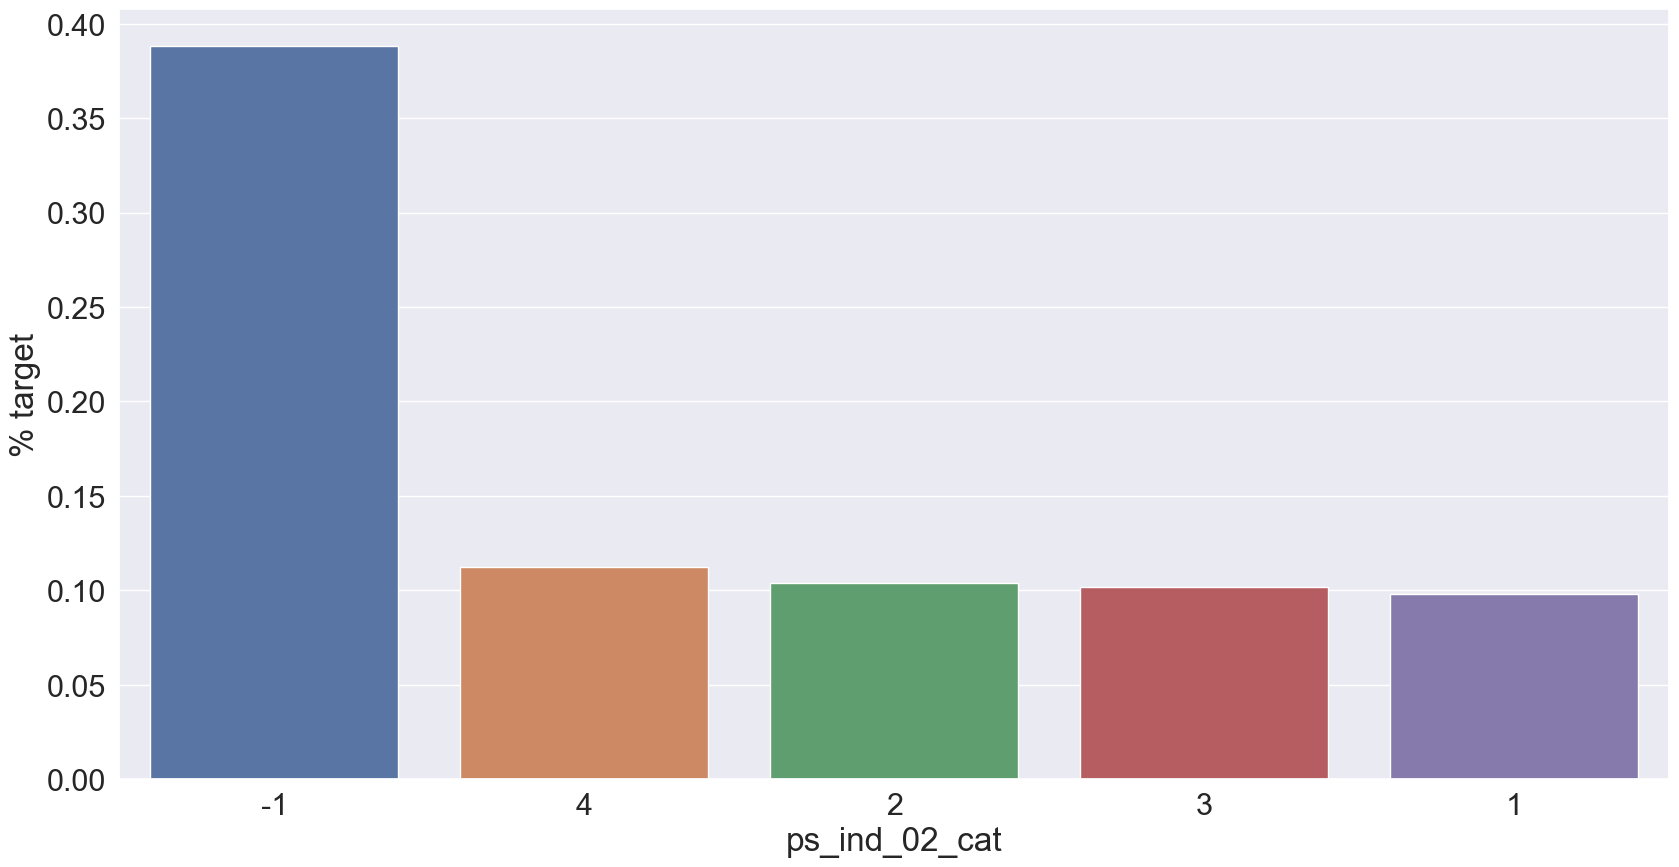

In [123]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
cat_perc.sort_values(by='target', ascending=False, inplace=True)
sns.barplot(data=cat_perc, x=f, y='target', order=cat_perc[f], ax=ax)
plt.ylabel('% target')
plt.xlabel(f)
plt.tick_params(axis='both', which='major')
plt.show()

In [124]:
cat_perc.sort_values(by='target')

,ps_ind_02_cat,target
1,1,0.098190
3,3,0.101746
2,2,0.104102
4,4,0.112349
0,-1,0.388350


<Figure size 640x480 with 0 Axes>

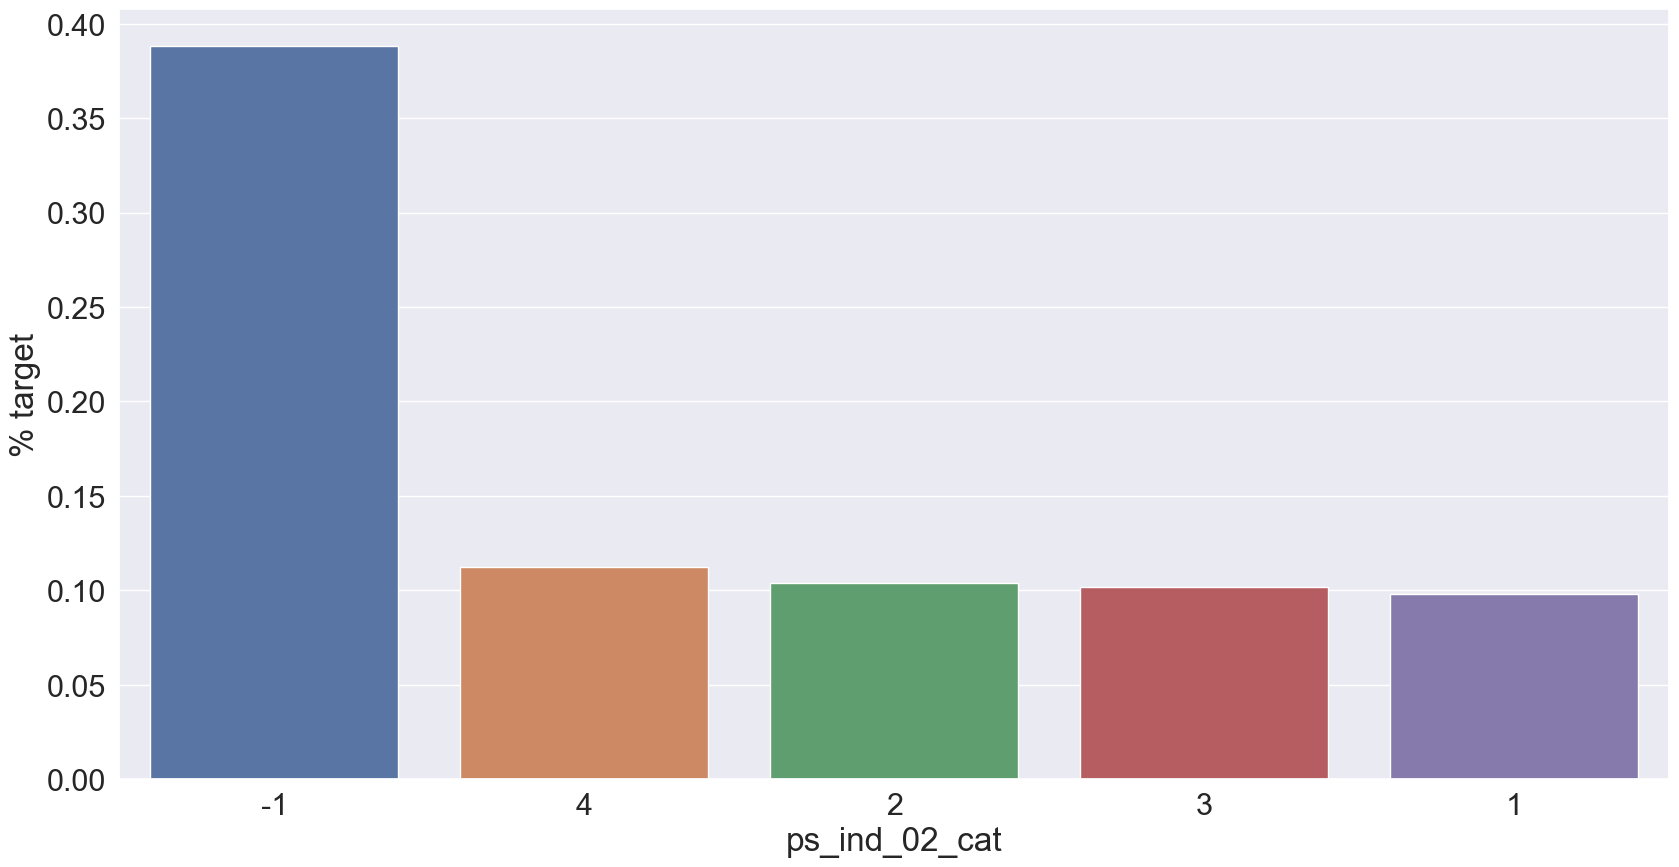

<Figure size 640x480 with 0 Axes>

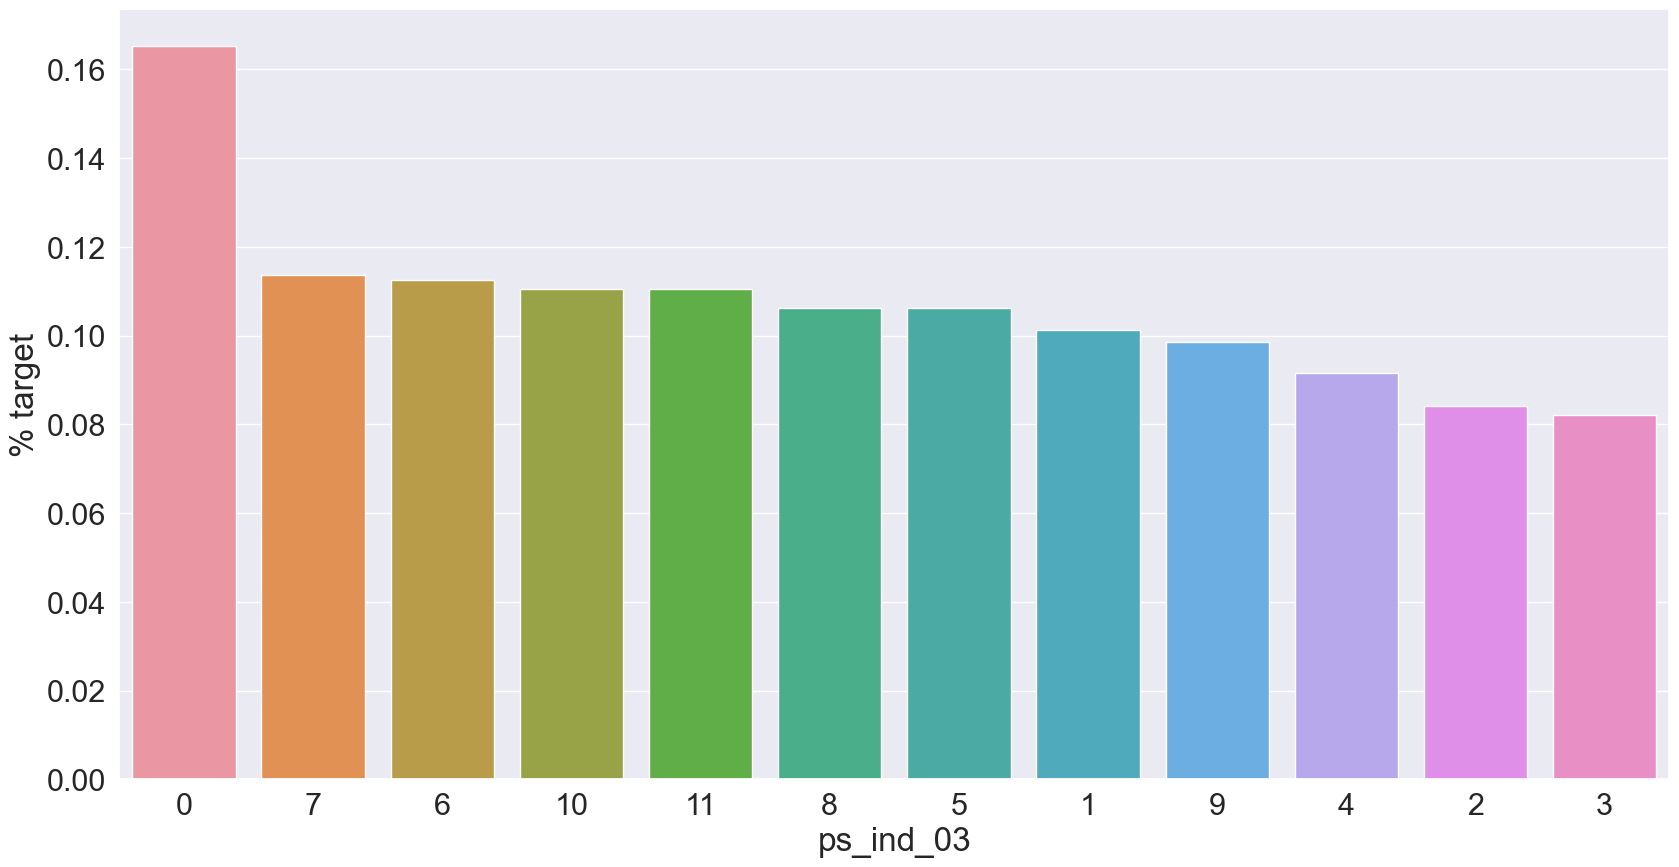

<Figure size 640x480 with 0 Axes>

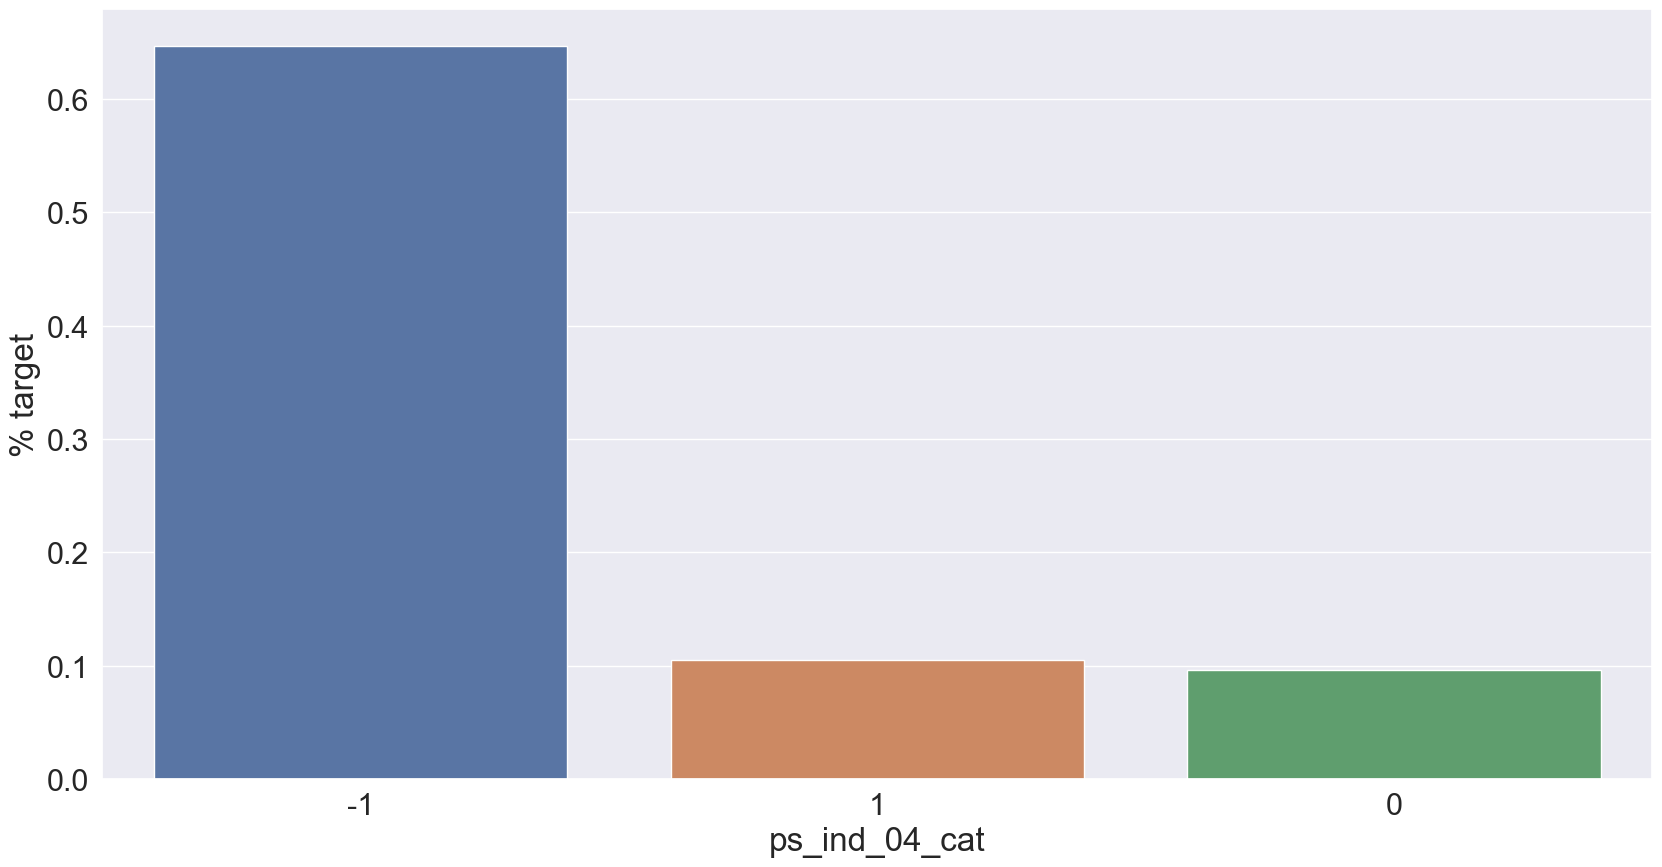

<Figure size 640x480 with 0 Axes>

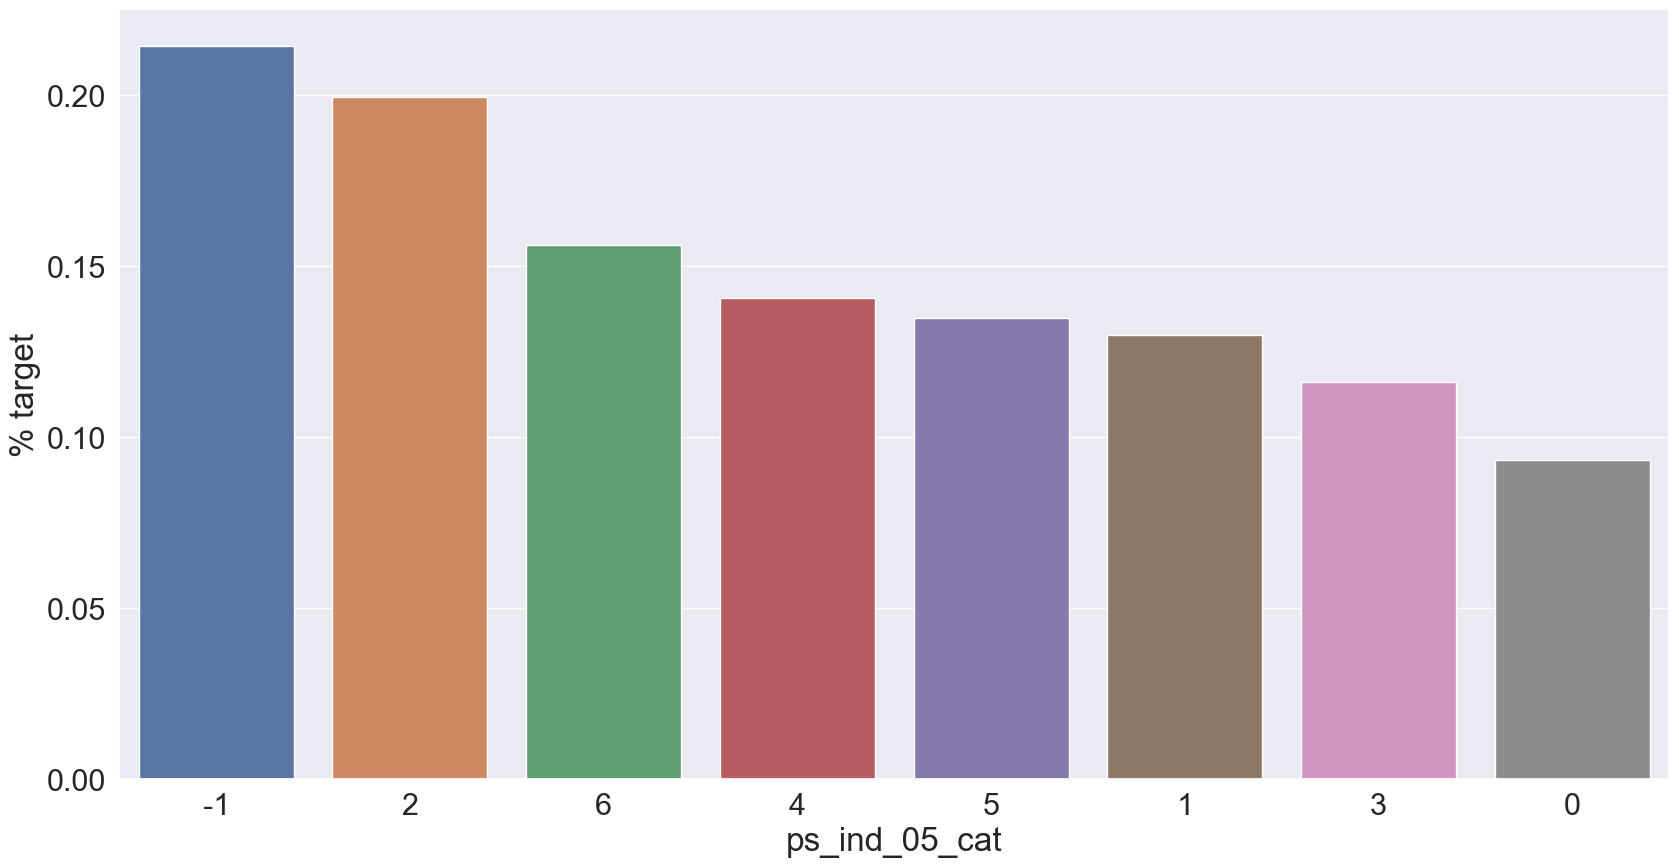

<Figure size 640x480 with 0 Axes>

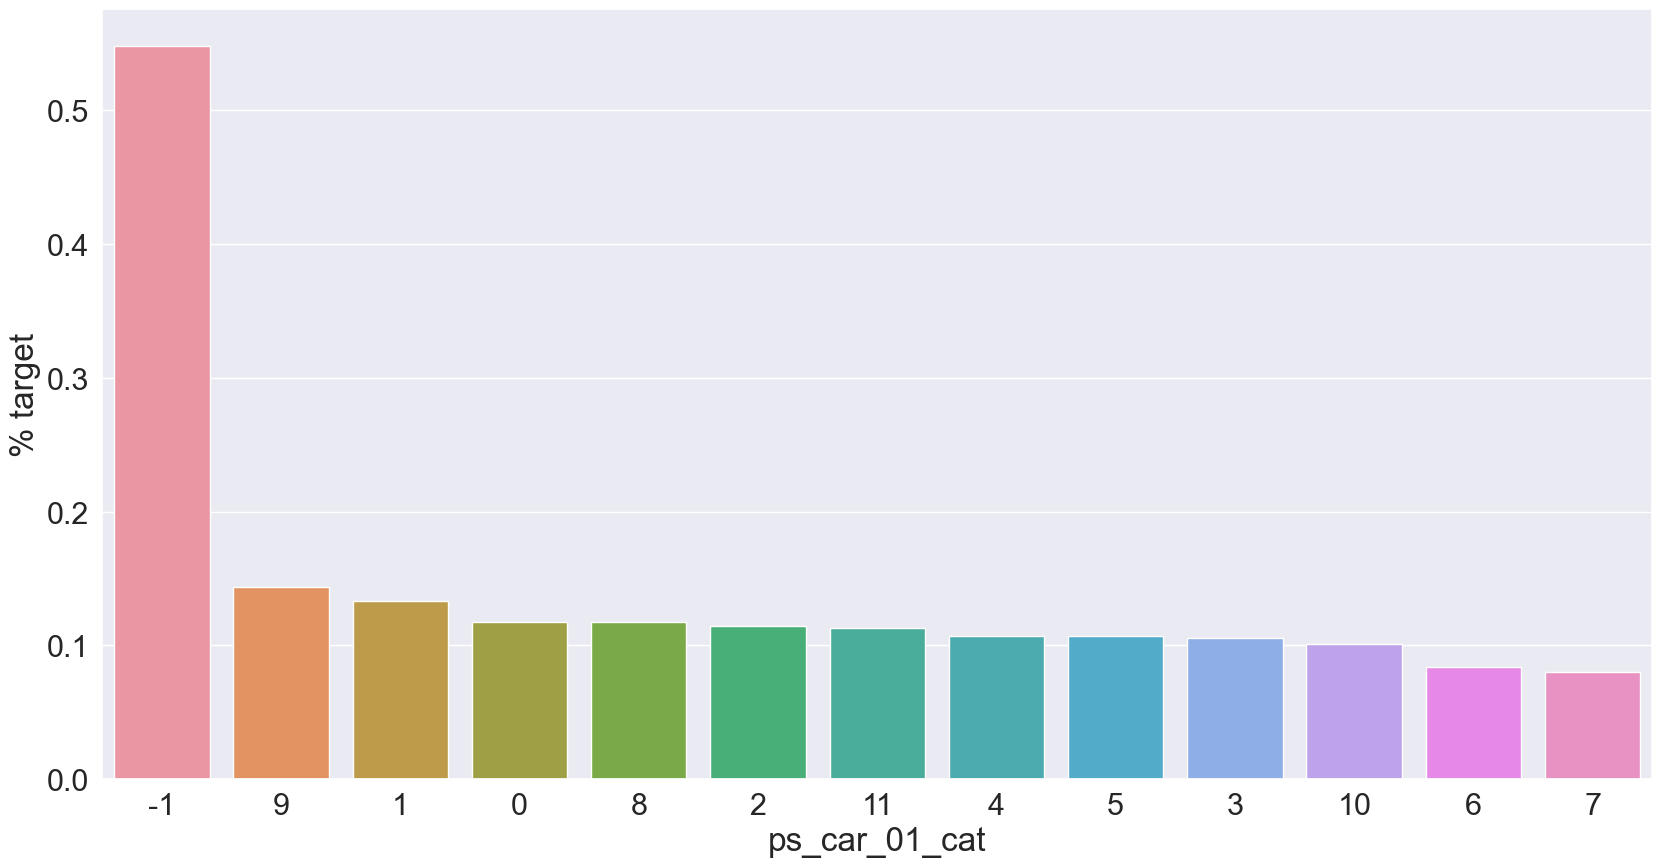

<Figure size 640x480 with 0 Axes>

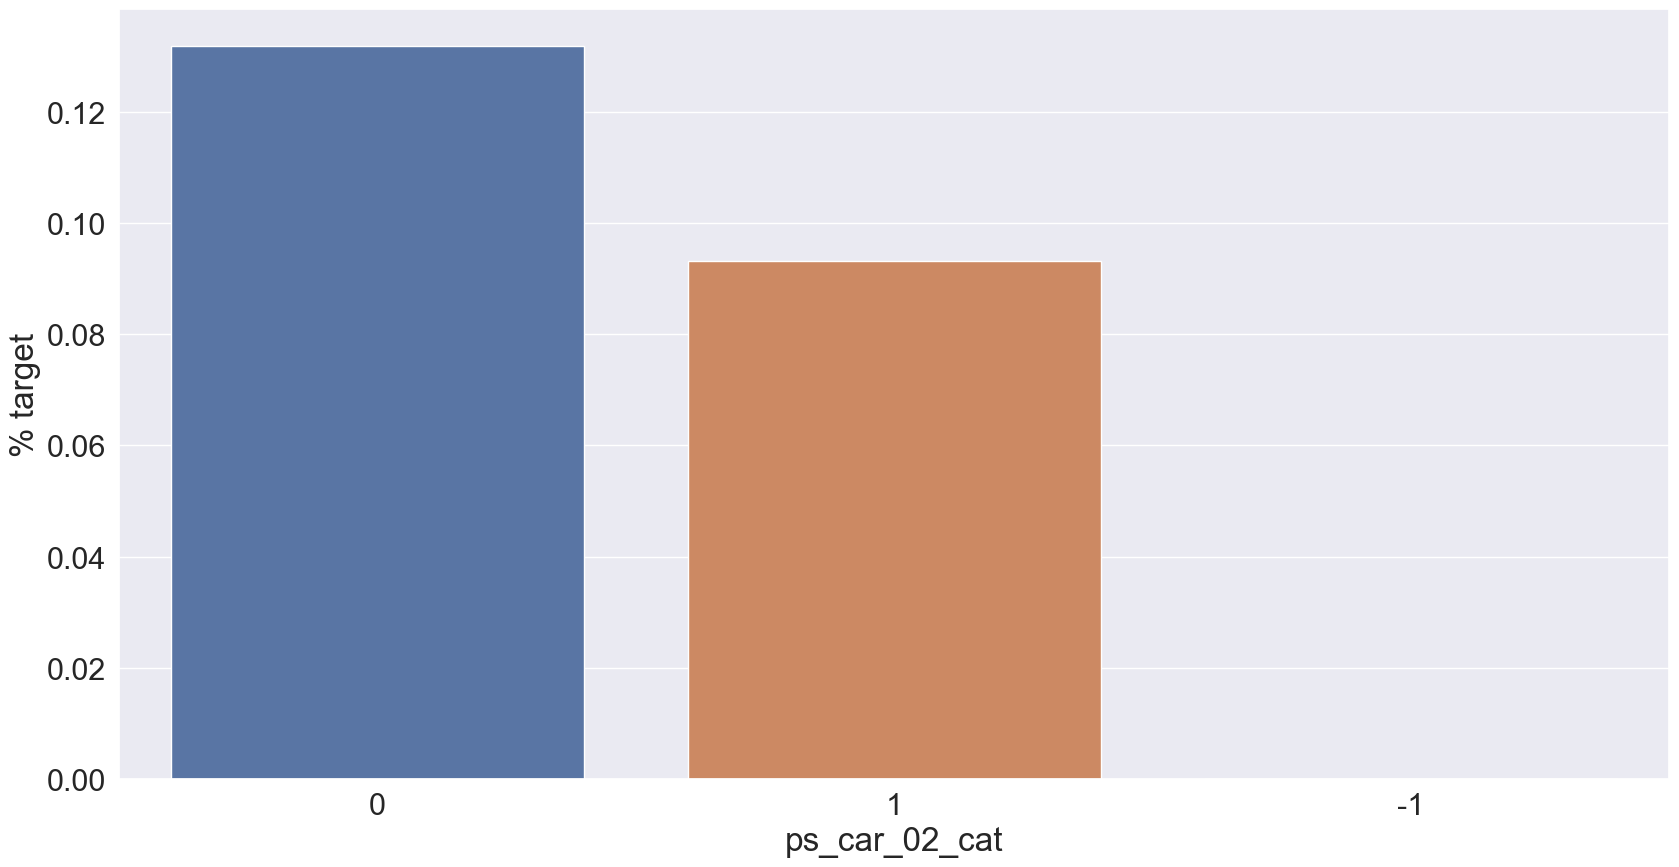

<Figure size 640x480 with 0 Axes>

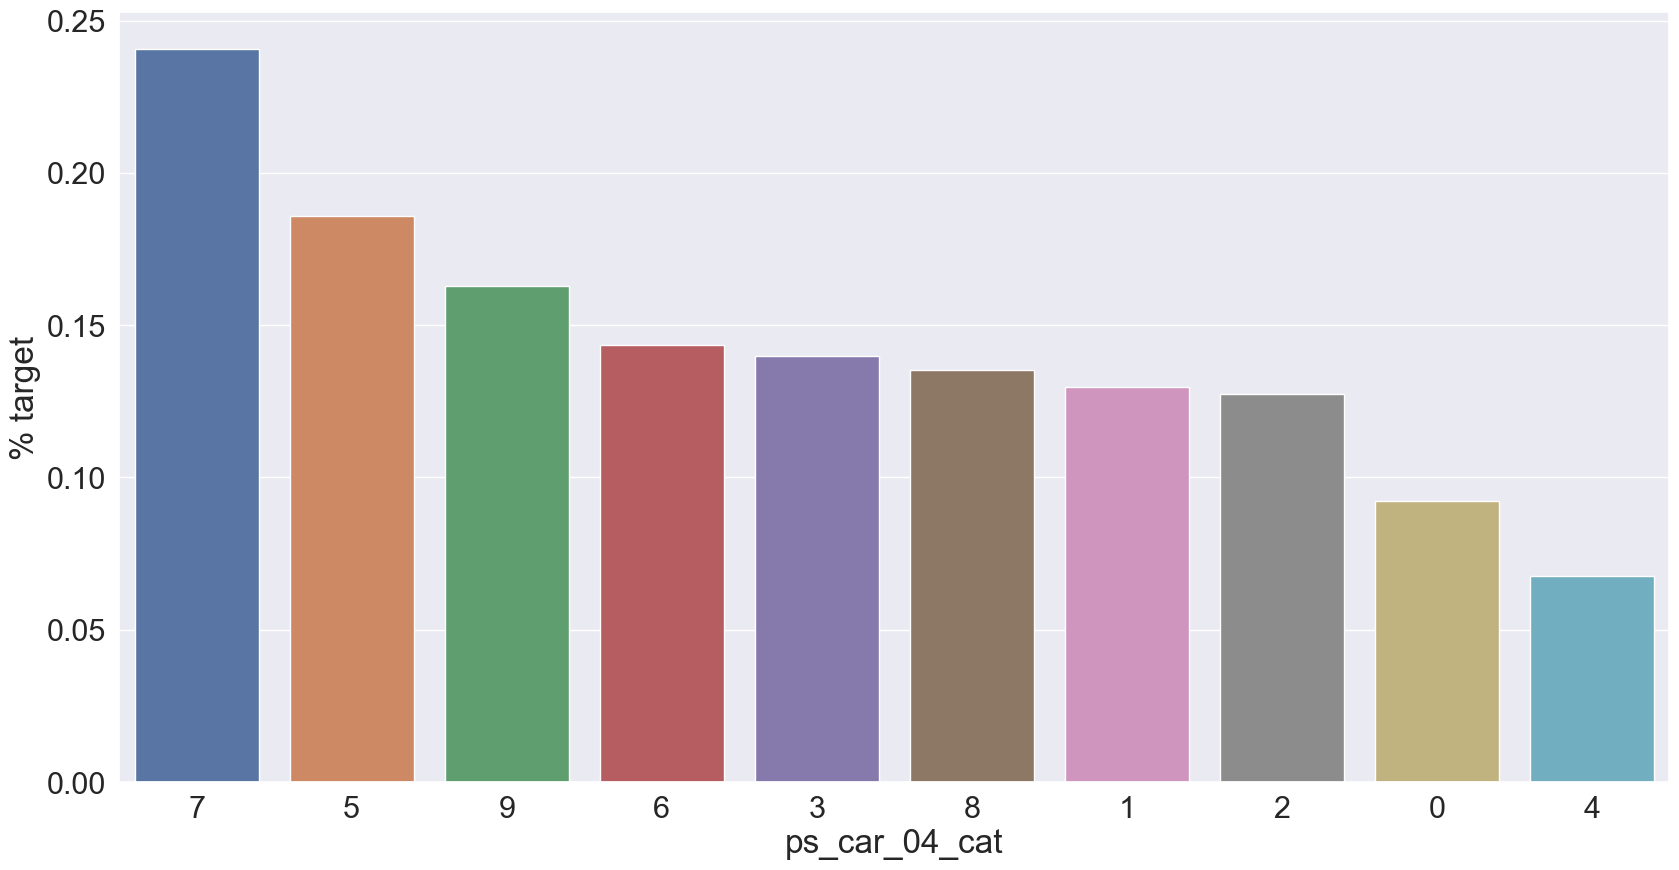

<Figure size 640x480 with 0 Axes>

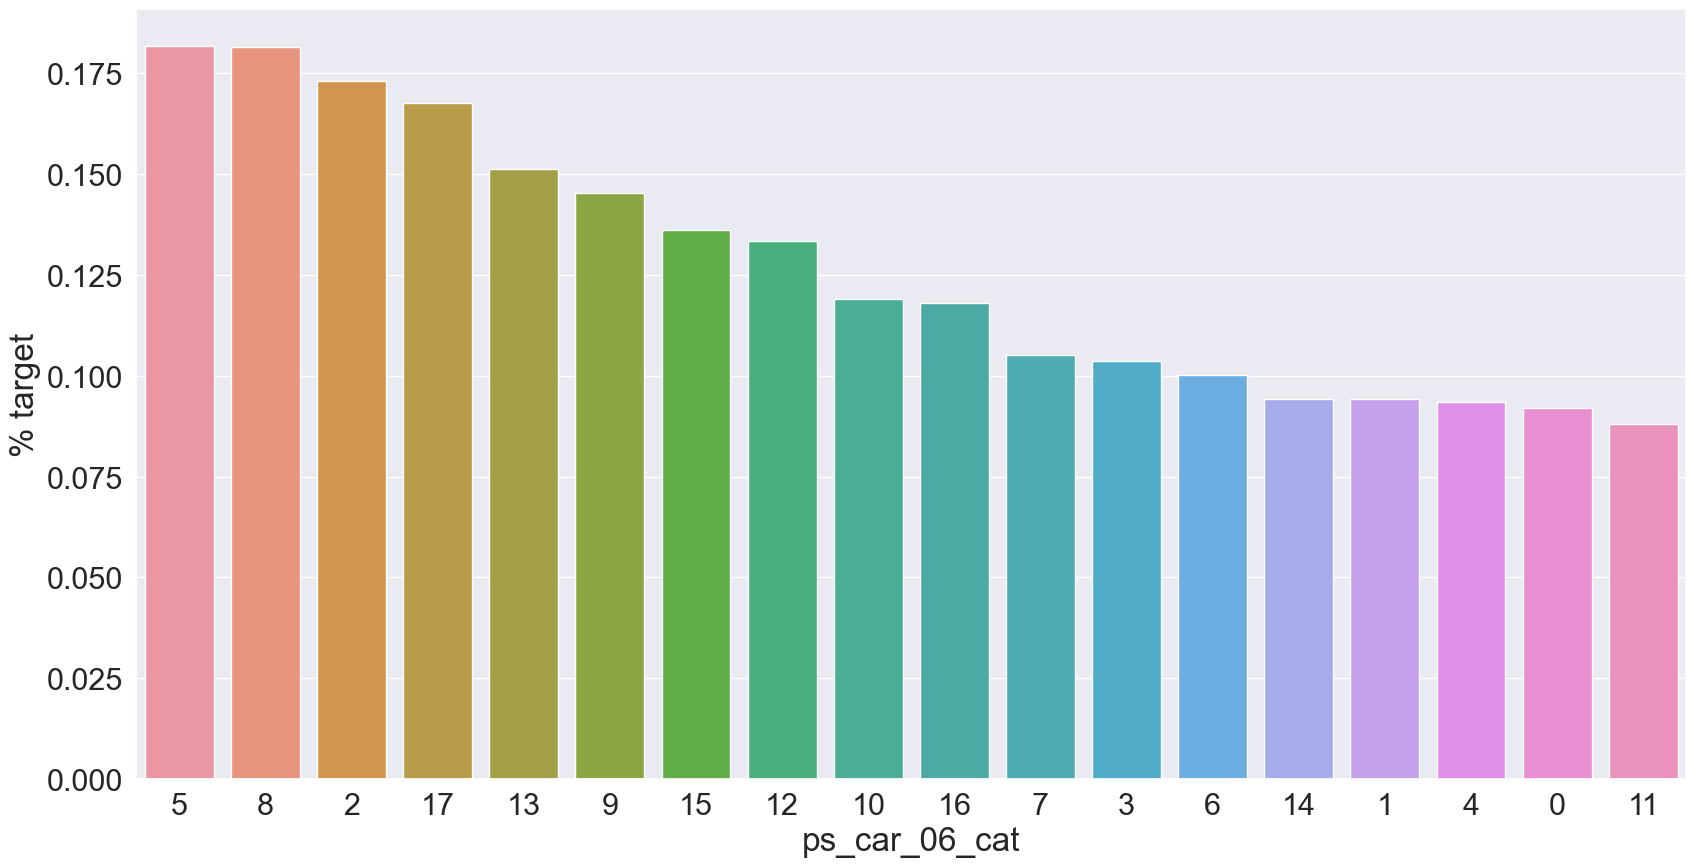

<Figure size 640x480 with 0 Axes>

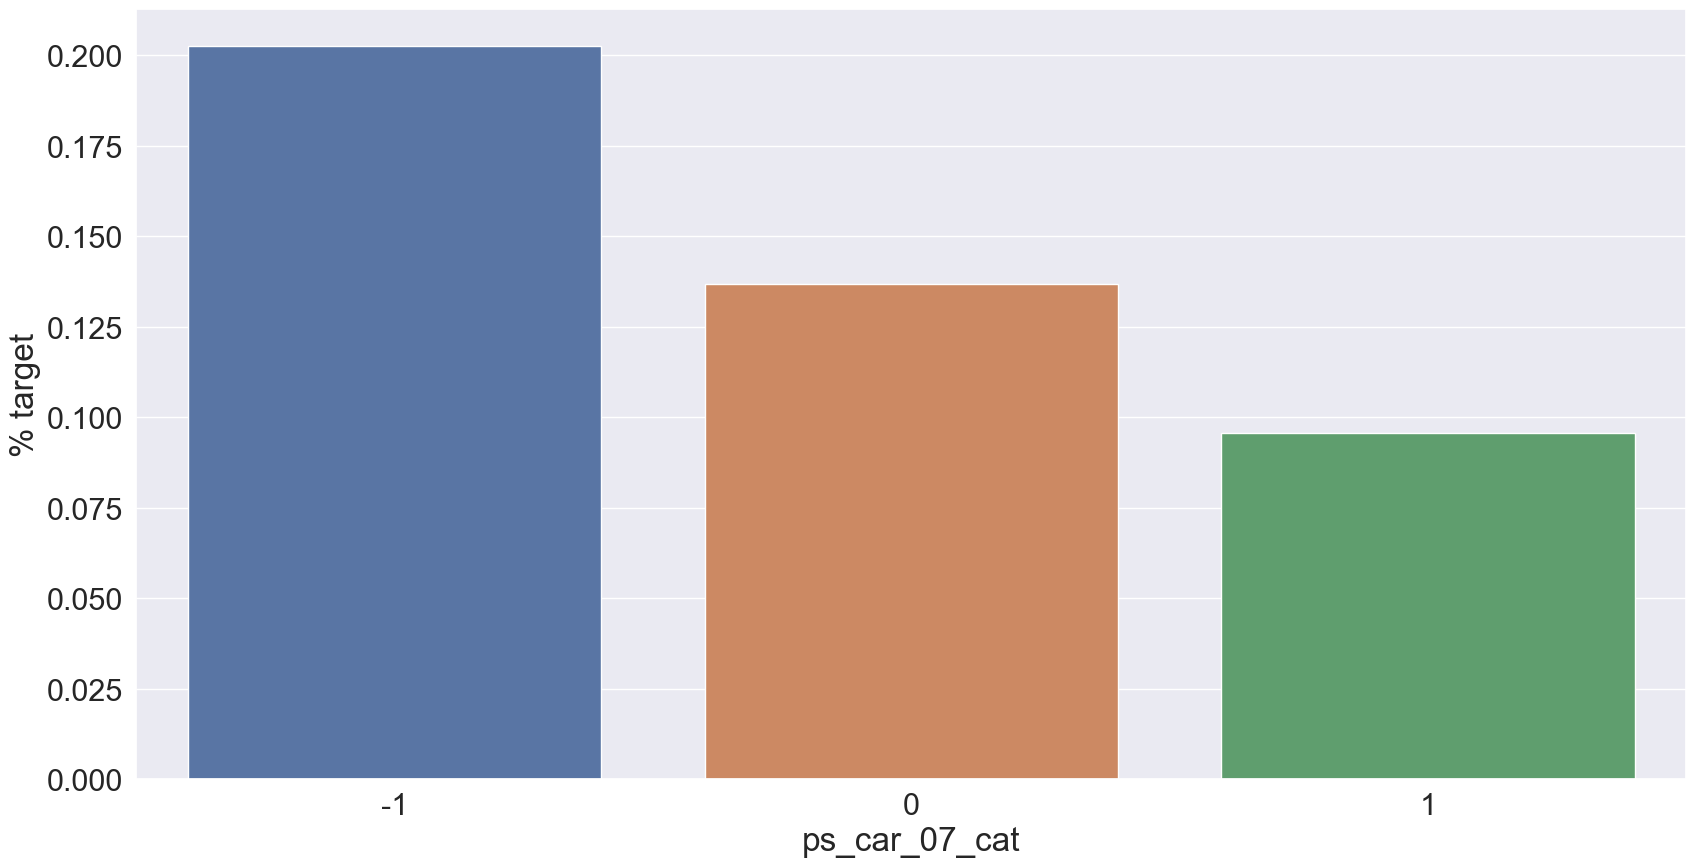

<Figure size 640x480 with 0 Axes>

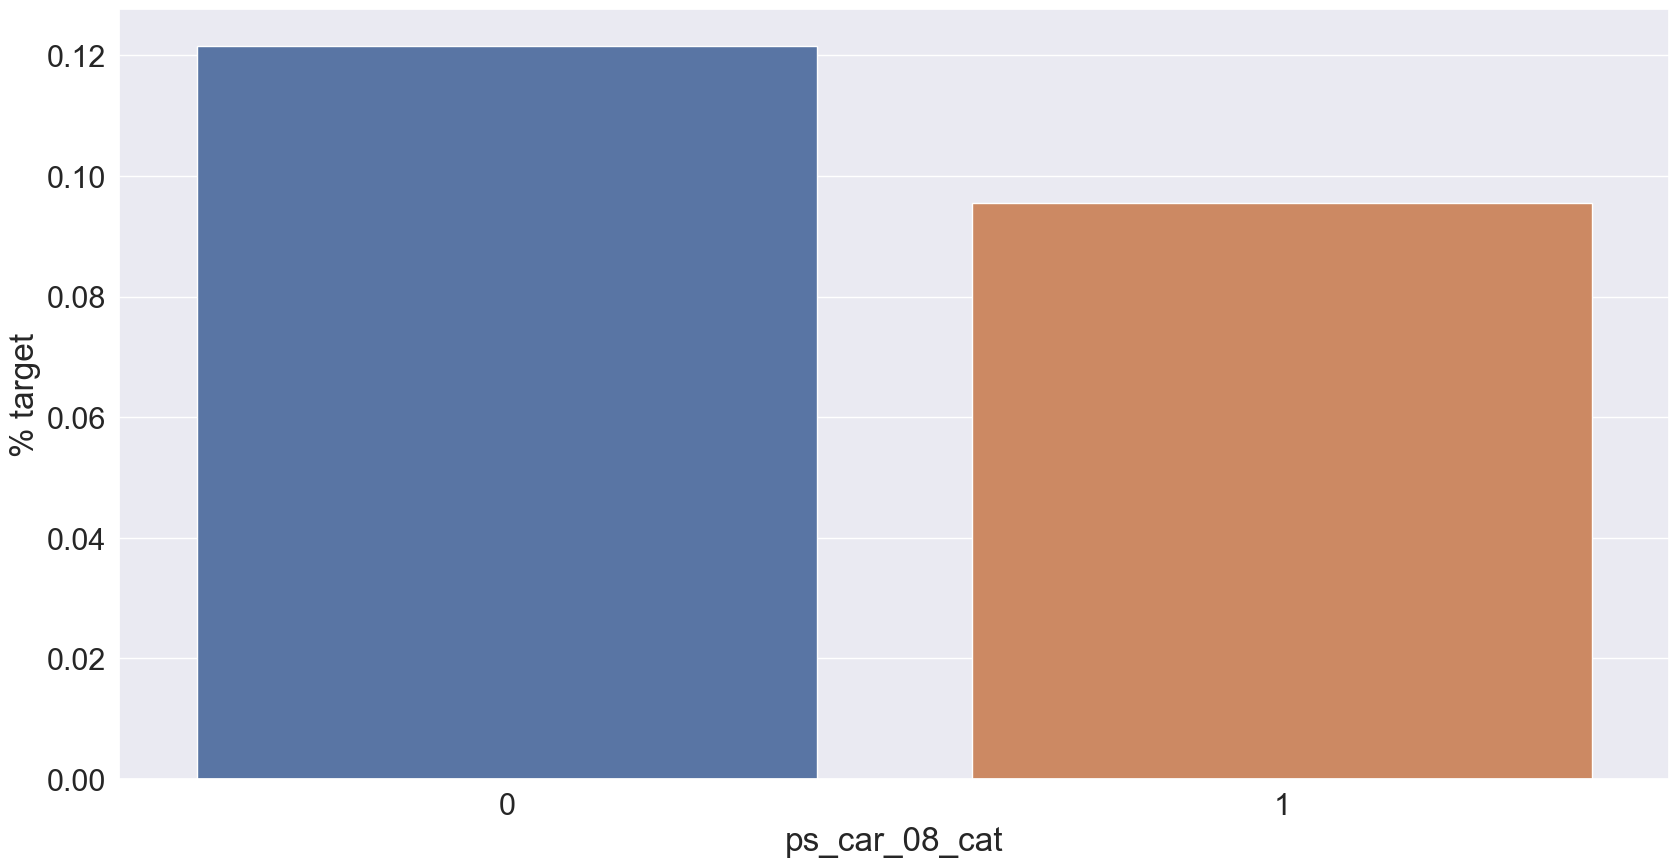

<Figure size 640x480 with 0 Axes>

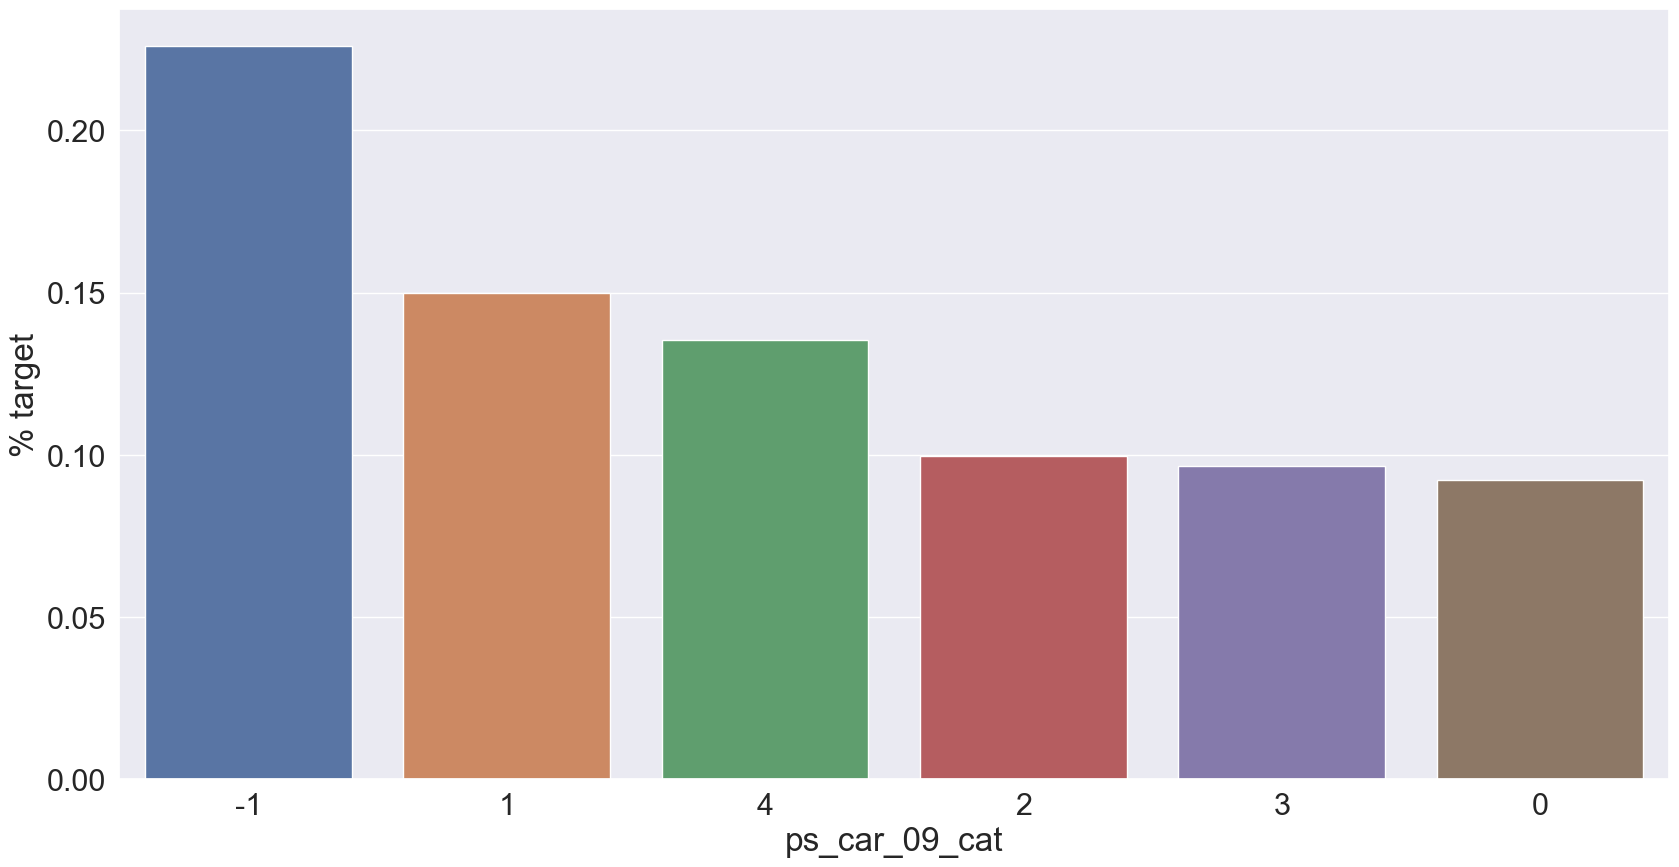

<Figure size 640x480 with 0 Axes>

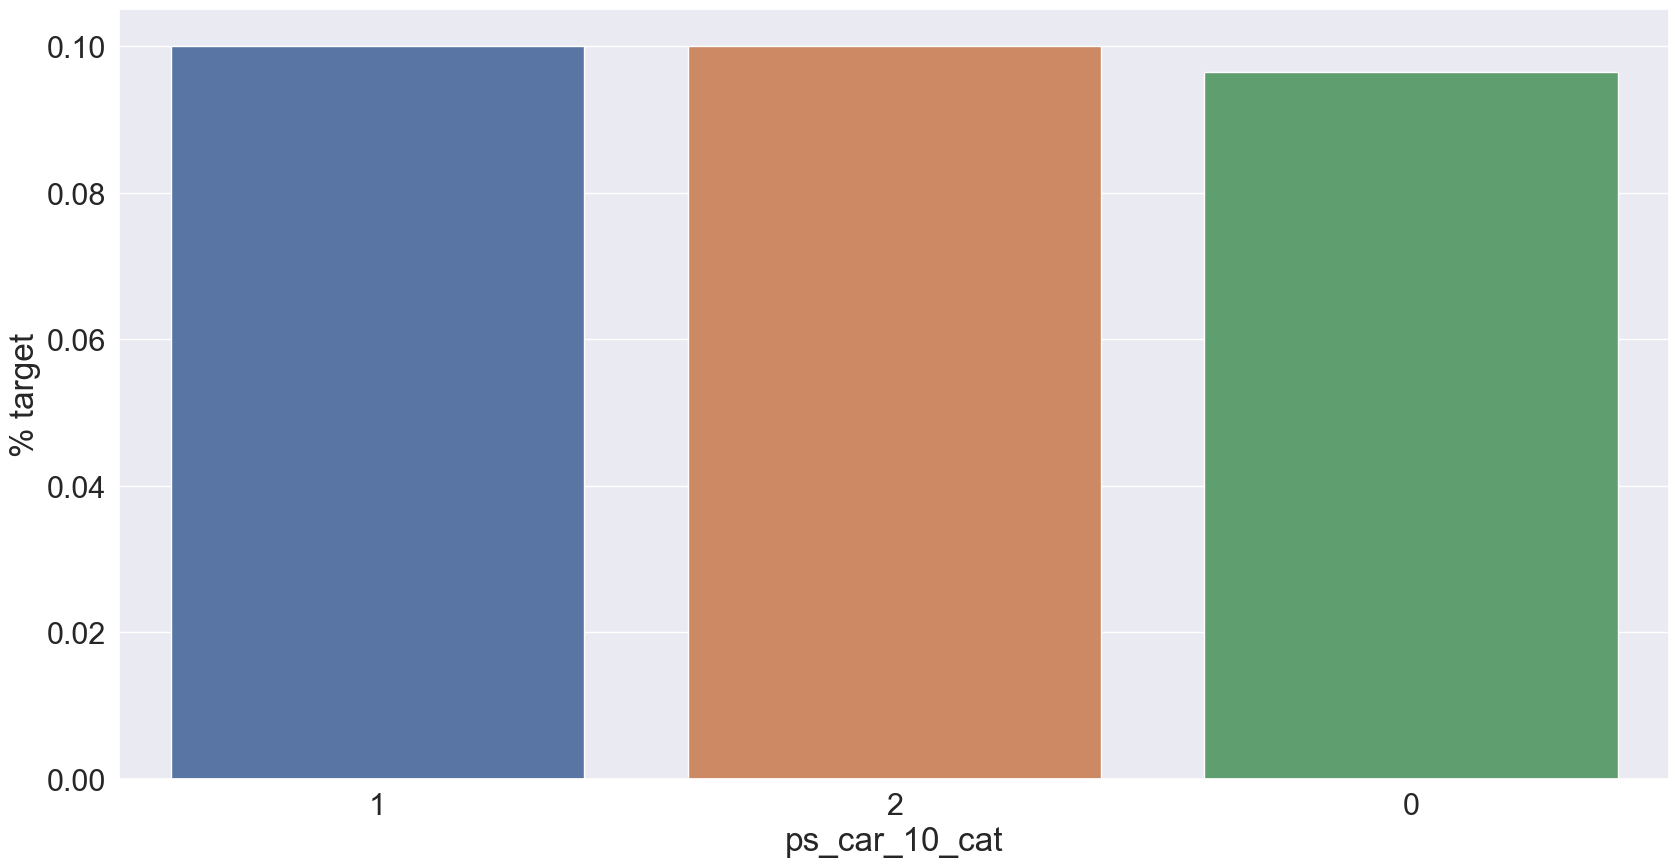

<Figure size 640x480 with 0 Axes>

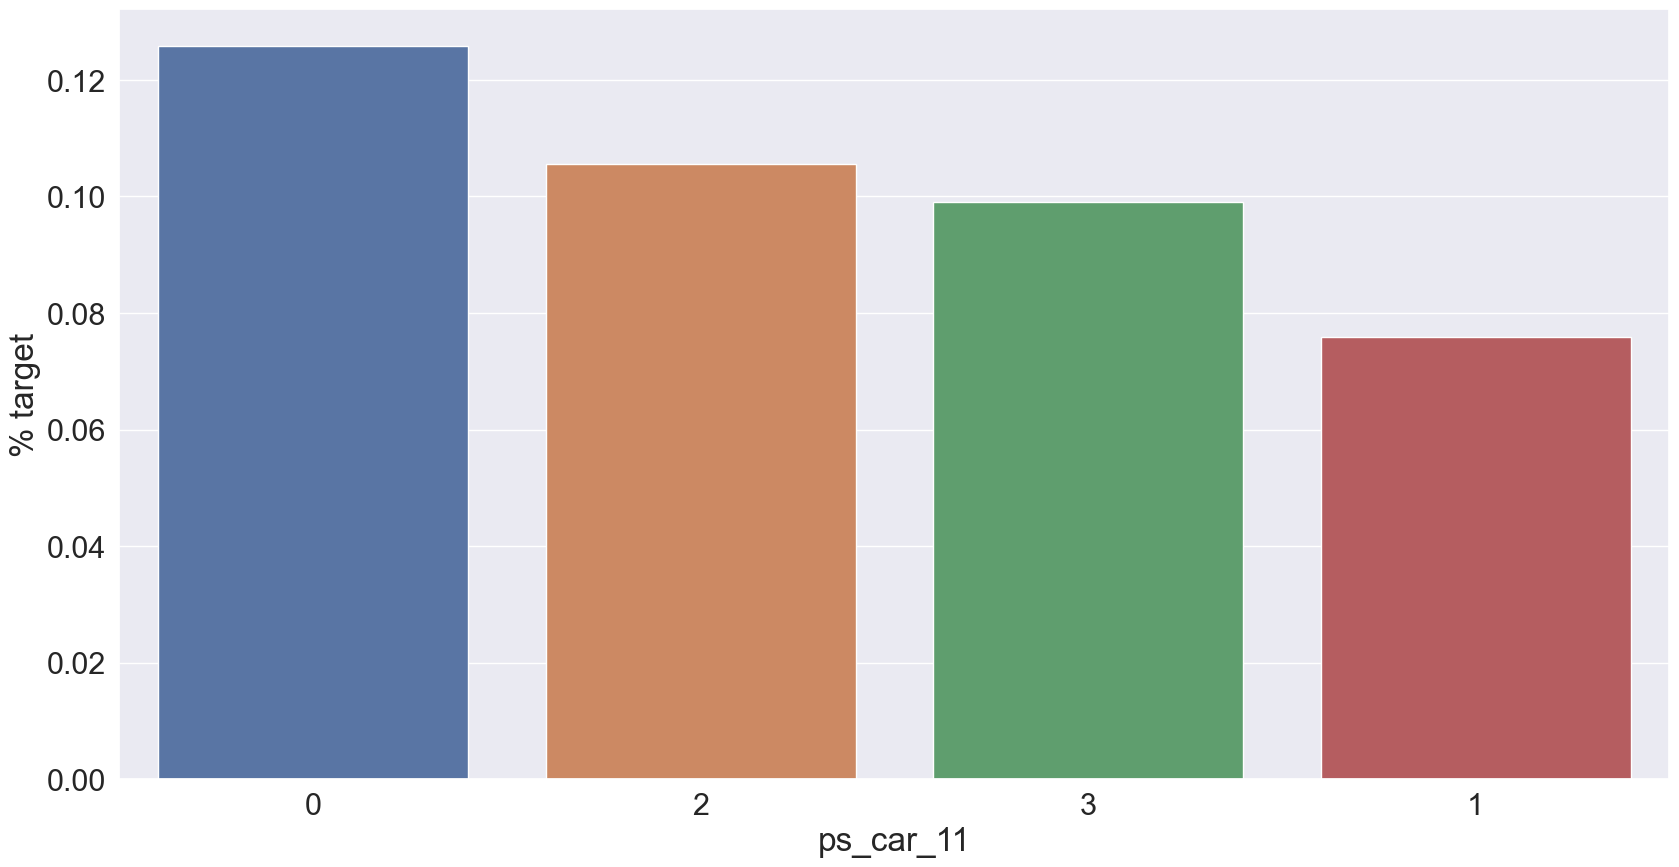

In [125]:
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    sns.barplot(data=cat_perc, x=f, y='target', order=cat_perc[f], ax=ax)
    plt.ylabel('% target')
    plt.xlabel(f)
    plt.tick_params(axis='both', which='major')
    plt.show()

- 실제 카운트를 봐야 정확도를 알수 있다

In [126]:
# 현재 drop을 해서 다시 불러와서 count를 봐야 함
f = 'ps_ind_04_cat'

cat_perc = train[[f, 'target']].groupby([f], as_index=False).agg(['mean', 'count'])
cat_perc   # 실재 count 가  -1 이 51개...

target        
                   mean   count
ps_ind_04_cat                  
-1             0.647059      51
 0             0.095856  125929
 1             0.105431   90960

In [127]:
f = 'ps_car_02_cat'

cat_perc = train[[f, 'target']].groupby([f], as_index=False).agg(['mean', 'count'])
cat_perc # 2개 밖에 없는데 보험 청구 안한다...너무 양이 적어서 정보로는;;;;;

target        
                   mean   count
ps_car_02_cat                  
-1             0.000000       2
 0             0.131868   38000
 1             0.093233  178938

In [128]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [129]:
train[v].corr()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
ps_reg_01,1.000000,0.470953,0.137117,0.019095,0.025243,-0.002536,0.001755,-0.003236,0.001459,-0.001371,-0.001239,0.001577,-0.004699,0.001206,-0.002714,0.002618,0.003270,-0.002695,0.001773,-0.001970,0.001925
ps_reg_02,0.470953,1.000000,0.702512,0.173736,0.193896,0.053149,0.052344,-0.001769,-0.000726,-0.000992,-0.001365,0.000483,-0.000959,0.001061,-0.002733,0.001906,0.004402,0.000929,0.001313,-0.002263,-0.000983
ps_reg_03,0.137117,0.702512,1.000000,0.208978,0.241244,0.079541,0.079848,-0.000223,0.000043,-0.000357,-0.001007,0.001331,-0.000027,0.000544,-0.000072,0.001667,0.003787,-0.000739,0.000600,-0.000808,-0.001732
ps_car_12,0.019095,0.173736,0.208978,1.000000,0.674298,0.577537,0.049468,-0.000452,-0.001070,-0.000707,-0.003156,0.002333,-0.001016,0.004413,-0.001735,0.002643,0.001991,0.003117,0.001106,-0.000956,0.003927
ps_car_13,0.025243,0.193896,0.241244,0.674298,1.000000,0.434613,0.526024,0.000266,0.000020,0.000568,0.001682,0.001949,-0.002779,0.000288,-0.002887,0.001648,0.002826,0.001675,0.001618,0.000836,0.002916
ps_car_14,-0.002536,0.053149,0.079541,0.577537,0.434613,1.000000,0.008472,-0.004548,-0.005015,0.000776,0.000614,-0.001647,0.002201,0.002370,-0.001641,0.000974,0.005423,0.002003,0.002893,0.000575,-0.000679
ps_car_15,0.001755,0.052344,0.079848,0.049468,0.526024,0.008472,1.000000,-0.000392,0.003630,0.000586,0.004635,-0.000297,-0.000525,-0.002366,-0.002431,-0.000785,0.002784,0.000344,0.001825,0.001196,0.003366
ps_calc_01,-0.003236,-0.001769,-0.000223,-0.000452,0.000266,-0.004548,-0.000392,1.000000,0.002832,-0.000212,0.000114,-0.003196,-0.001829,0.002359,-0.001564,-0.001046,-0.003189,-0.000585,-0.004807,-0.000673,0.000973
ps_calc_02,0.001459,-0.000726,0.000043,-0.001070,0.000020,-0.005015,0.003630,0.002832,1.000000,0.003130,-0.000396,0.000246,-0.000283,0.004727,0.000108,0.001105,0.000737,-0.000235,-0.005717,0.001400,0.000254
ps_calc_03,-0.001371,-0.000992,-0.000357,-0.000707,0.000568,0.000776,0.000586,-0.000212,0.003130,1.000000,0.000237,0.002919,-0.000177,0.002505,0.002108,-0.005039,-0.000723,-0.002650,0.004129,0.000901,-0.002571


In [130]:
correlations = train[v].corr()

In [131]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)# 도화지

In [132]:
sns.set(font_scale=0.8)

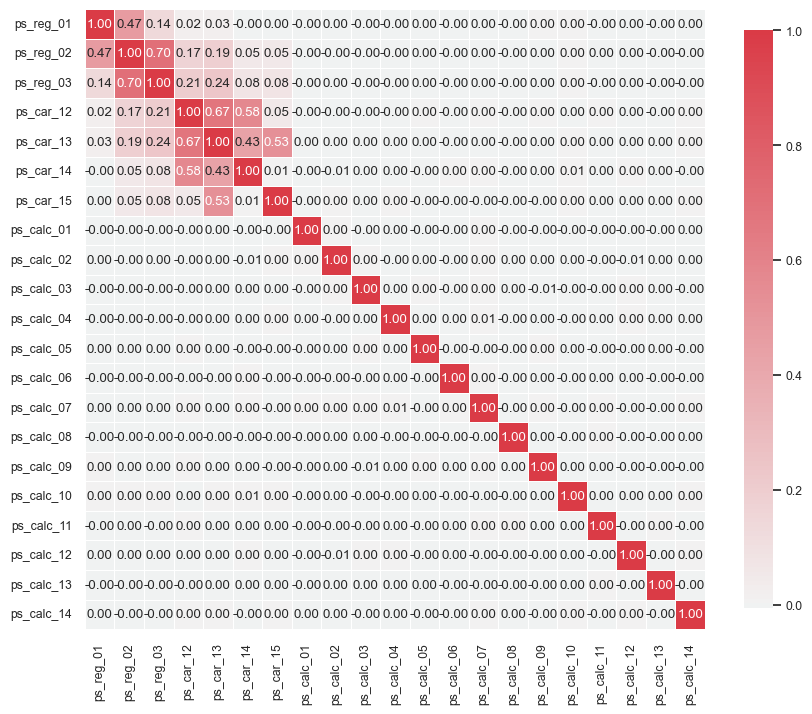

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
           square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})
plt.show()

#### There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.53)
- NOTE: I take a sample of the train data to speed up the process.

In [134]:
s = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03

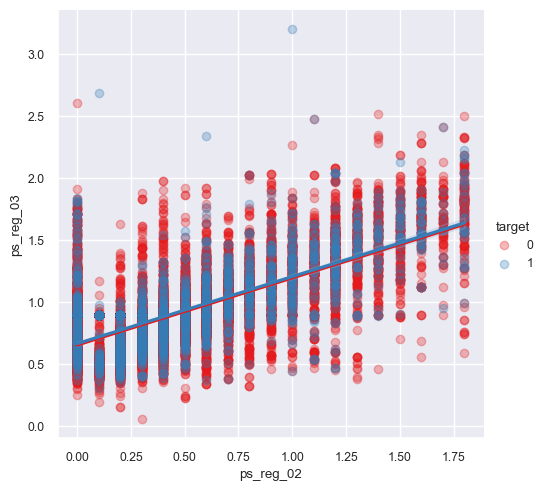

In [135]:
sns.lmplot(data=s, x='ps_reg_02', y='ps_reg_03', hue='target', palette='Set1', scatter_kws={'alpha':0.3})

- 코드는 Seaborn 라이브러리를 사용하여 산점도와 회귀선을 그리는 작업을 수행합니다. 

- sns.lmplot(...): Seaborn 라이브러리의 lmplot() 함수를 호출하여 산점도와 회귀선을 그립니다.

- data=s: 데이터프레임 s를 사용하여 산점도를 그립니다.

- x='ps_reg_02', y='ps_reg_03': x축에는 'ps_reg_02' 열의 값을, y축에는 'ps_reg_03' 열의 값을 사용합니다. 이로써 산점도의 x, y 축을 설정합니다.

- hue='target': 'target' 열을 기준으로 데이터를 색상으로 구분합니다. 즉, 'target' 값에 따라 데이터 포인트의 색상이 다르게 표시됩니다.

- palette='Set1': 색상 팔레트를 지정합니다. 여기서는 'Set1' 팔레트를 사용하여 다양한 색상을 제공합니다.

- scatter_kws={'alpha':0.3}: 산점도 그래프의 추가적인 설정을 제공합니다. 여기서는 alpha 값을 0.3으로 설정하여 데이터 포인트의 투명도를 조정합니다. 이렇게 하면 데이터 포인트가 서로 겹쳐 보이지 않을 만큼 투명하게 표시됩니다.

- 이렇게 코드를 실행하면 'ps_reg_02'와 'ps_reg_03' 열을 x, y 축으로 하는 산점도를 그리고, 'target' 열의 값에 따라 색상을 다르게 표시하며, 데이터 포인트의 투명도를 조정한 결과를 얻을 수 있습니다. 이를 통해 두 변수 간의 관계와 분포를 시각적으로 파악할 수 있습니다.

#### ps_car_12 and ps_car_13

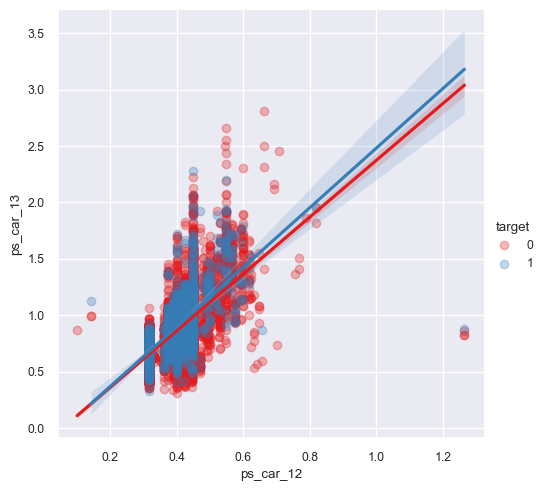

In [136]:
sns.lmplot(data=s, x='ps_car_12', y='ps_car_13', hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_14

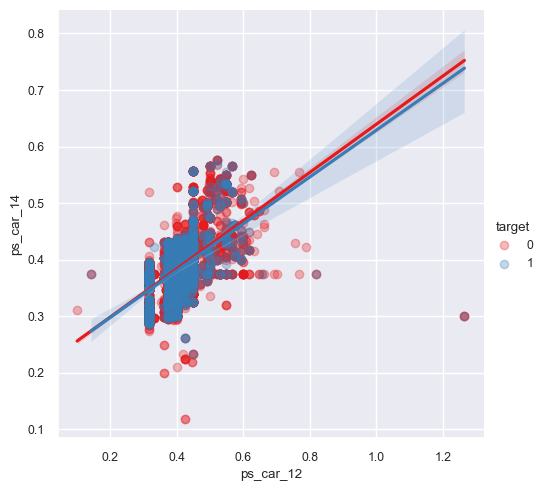

In [137]:
sns.lmplot(data=s, x='ps_car_12', y='ps_car_14', hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 and ps_car_15

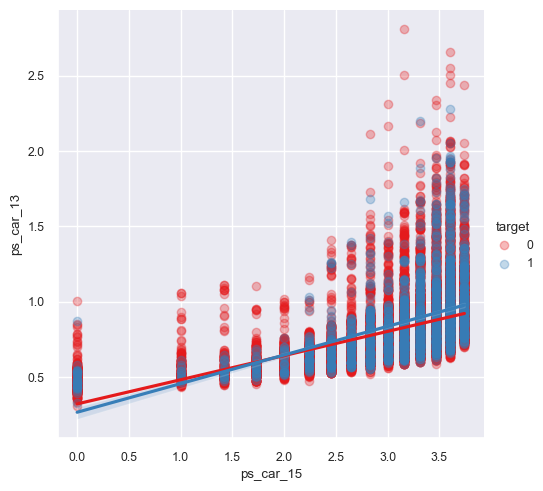

In [138]:
sns.lmplot( data=s, x='ps_car_15', y='ps_car_13',hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## Feature engineering

#### Creating dummy variables  --> One_hot Encoding

In [139]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [140]:
train.shape[0]

216940

In [141]:
train.shape[1]

57

In [142]:
train = pd.get_dummies(train, columns = v, drop_first=True)
# One_hot Encoding 은 하나를 빼도 상관이 없으므로...

In [143]:
train.shape[1]

121

- Before dummification we have 57 variables in train
- After dummification we have 121 variables in train

#### Creating interaction variables

In [144]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 121 variables in train
After creating interactions we have 352 variables in train


In [145]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [146]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# interaction_only=False : 자기자신을 제곱하는거 포함

In [147]:
pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_01 ps_calc_04,ps_reg_01 ps_calc_05,ps_reg_01 ps_calc_06,ps_reg_01 ps_calc_07,ps_reg_01 ps_calc_08,ps_reg_01 ps_calc_09,ps_reg_01 ps_calc_10,ps_reg_01 ps_calc_11,ps_reg_01 ps_calc_12,ps_reg_01 ps_calc_13,ps_reg_01 ps_calc_14,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,...,ps_calc_05 ps_calc_10,ps_calc_05 ps_calc_11,ps_calc_05 ps_calc_12,ps_calc_05 ps_calc_13,ps_calc_05 ps_calc_14,ps_calc_06^2,ps_calc_06 ps_calc_07,ps_calc_06 ps_calc_08,ps_calc_06 ps_calc_09,ps_calc_06 ps_calc_10,ps_calc_06 ps_calc_11,ps_calc_06 ps_calc_12,ps_calc_06 ps_calc_13,ps_calc_06 ps_calc_14,ps_calc_07^2,ps_calc_07 ps_calc_08,ps_calc_07 ps_calc_09,ps_calc_07 ps_calc_10,ps_calc_07 ps_calc_11,ps_calc_07 ps_calc_12,ps_calc_07 ps_calc_13,ps_calc_07 ps_calc_14,ps_calc_08^2,ps_calc_08 ps_calc_09,ps_calc_08 ps_calc_10,ps_calc_08 ps_calc_11,ps_calc_08 ps_calc_12,ps_calc_08 ps_calc_13,ps_calc_08 ps_calc_14,ps_calc_09^2,ps_calc_09 ps_calc_10,ps_calc_09 ps_calc_11,ps_calc_09 ps_calc_12,ps_calc_09 ps_calc_13,ps_calc_09 ps_calc_14,ps_calc_10^2,ps_calc_10 ps_calc_11,ps_calc_10 ps_calc_12,ps_calc_10 ps_calc_13,ps_calc_10 ps_calc_14,ps_calc_11^2,ps_calc_11 ps_calc_12,ps_calc_11 ps_calc_13,ps_calc_11 ps_calc_14,ps_calc_12^2,ps_calc_12 ps_calc_13,ps_calc_12 ps_calc_14,ps_calc_13^2,ps_calc_13 ps_calc_14,ps_calc_14^2
0,0.6,0.6,0.838153,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3.0,0.0,7.0,3.0,8.0,4.0,8.0,1.0,0.0,4.0,6.0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,1.8,0.0,4.2,1.8,4.8,2.4,4.8,0.6,0.0,2.4,3.6,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,...,0.0,0.0,0.0,0.0,0.0,49.0,21.0,56.0,28.0,56.0,7.0,0.0,28.0,42.0,9.0,24.0,12.0,24.0,3.0,0.0,12.0,18.0,64.0,32.0,64.0,8.0,0.0,32.0,48.0,16.0,32.0,4.0,0.0,16.0,24.0,64.0,8.0,0.0,32.0,48.0,1.0,0.0,4.0,6.0,0.0,0.0,0.0,16.0,24.0,36.0
1,0.9,0.6,0.728440,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1.0,1.0,7.0,5.0,10.0,4.0,11.0,3.0,0.0,3.0,7.0,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.000000,0.18,0.00,0.54,0.9,0.9,6.3,4.5,9.0,3.6,9.9,2.7,0.0,2.7,6.3,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,...,11.0,3.0,0.0,3.0,7.0,49.0,35.0,70.0,28.0,77.0,21.0,0.0,21.0,49.0,25.0,50.0,20.0,55.0,15.0,0.0,15.0,35.0,100.0,40.0,110.0,30.0,0.0,30.0,70.0,16.0,44.0,12.0,0.0,12.0,28.0,121.0,33.0,0.0,33.0,77.0,9.0,0.0,9.0,21.0,0.0,0.0,0.0,9.0,21.0,49.0
2,0.9,0.6,0.869267,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4.0,1.0,8.0,5.0,10.0,2.0,8.0,7.0,2.0,3.0,10.0,0.81,0.54,0.782340,0.360000,0.732844,0.362131,2.984962,0.27,0.81,0.09,3.6,0.9,7.2,4.5,9.0,1.8,7.2,6.3,1.8,2.7,9.0,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,...,8.0,7.0,2.0,3.0,10.0,64.0,40.0,80.0,16.0,64.0,56.0,16.0,24.0,80.0,25.0,50.0,10.0,40.0,35.0,10.0,15.0,50.0,100.0,20.0,80.0,70.0,20.0,30.0,100.0,4.0,16.0,14.0,4.0,6.0,20.0,64.0,56.0,16.0,24.0,80.0,49.0,14.0,21.0,70.0,4.0,6.0,20.0,9.0,30.0,100.0
3,0.6,1.5,1.705872,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3.0,3.0,7.0,2.0,11.0,3.0,10.0,2.0,2.0,0.0,14.0,0.36,0.90,1.023523,0.240000,0.503032,0.227051,2.163331,0.48,0.24,0.06,1.8,1.8,4.2,1.2,6.6,1.8,6.0,1.2,1.2,0.0,8.4,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,...,30.0,6.0,6.0,0.0,42.0,49.0,14.0,77.0,21.0,70.0,14.0,14.0,0.0,98.0,4.0,22.0,6.0,20.0,4.0,4.0,0.0,28.0,121.0,33.0,110.0,22.0,22.0,0.0,154.0,9.0,30.0,6.0,6.0,0.0,42.0,100.0,20.0,20.0,0.0,140.0,4.0,4.0,0.0,28.0,4.0,0.0,28.0,0.0,0.0,196.0
4,0.8,0.8,1.086566,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3

In [148]:
poly.fit_transform(train[v])

array([[  0.6       ,   0.6       ,   0.83815273, ...,  16.        ,
         24.        ,  36.        ],
       [  0.9       ,   0.6       ,   0.72844011, ...,   9.        ,
         21.        ,  49.        ],
       [  0.9       ,   0.6       ,   0.86926693, ...,   9.        ,
         30.        , 100.        ],
       ...,
       [  0.9       ,   0.3       ,   0.71195154, ...,   1.        ,
          6.        ,  36.        ],
       [  0.6       ,   0.1       ,   0.57716982, ...,  16.        ,
         16.        ,  16.        ],
       [  0.6       ,   0.4       ,   1.09515981, ...,  16.        ,
         36.        ,  81.        ]])

In [149]:
train[v]

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,0.6,0.6,0.838153,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6
1,0.9,0.6,0.728440,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7
2,0.9,0.6,0.869267,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10
3,0.6,1.5,1.705872,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14
4,0.8,0.8,1.086566,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,0.6,0.4,1.537652,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7
216936,0.3,0.4,0.898861,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5
216937,0.9,0.3,0.711952,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6
216938,0.6,0.1,0.577170,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4


In [150]:
poly.fit_transform(train[v]).shape

(216940, 252)

In [151]:
poly.get_feature_names_out(v)

array(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07',
       'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_reg_01^2',
       'ps_reg_01 ps_reg_02', 'ps_reg_01 ps_reg_03',
       'ps_reg_01 ps_car_12', 'ps_reg_01 ps_car_13',
       'ps_reg_01 ps_car_14', 'ps_reg_01 ps_car_15',
       'ps_reg_01 ps_calc_01', 'ps_reg_01 ps_calc_02',
       'ps_reg_01 ps_calc_03', 'ps_reg_01 ps_calc_04',
       'ps_reg_01 ps_calc_05', 'ps_reg_01 ps_calc_06',
       'ps_reg_01 ps_calc_07', 'ps_reg_01 ps_calc_08',
       'ps_reg_01 ps_calc_09', 'ps_reg_01 ps_calc_10',
       'ps_reg_01 ps_calc_11', 'ps_reg_01 ps_calc_12',
       'ps_reg_01 ps_calc_13', 'ps_reg_01 ps_calc_14', 'ps_reg_02^2',
       'ps_reg_02 ps_reg_03', 'ps_reg_02 ps_car_12',
       'ps_reg_02 ps_car_13', 'ps_reg_02 ps_car_14'

In [152]:
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))

In [153]:
interactions.drop(v, axis=1, inplace=True) # 원래의 columns은 중첩으로 삭제
# axis=1 중요

In [154]:
train.shape

(216940, 352)

In [155]:
pd.concat([train, interactions], axis=1)

,id,target,ps_ind_01,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_03_1,ps_ind_03_2,...,ps_calc_05 ps_calc_10,ps_calc_05 ps_calc_11,ps_calc_05 ps_calc_12,ps_calc_05 ps_calc_13,ps_calc_05 ps_calc_14,ps_calc_06^2,ps_calc_06 ps_calc_07,ps_calc_06 ps_calc_08,ps_calc_06 ps_calc_09,ps_calc_06 ps_calc_10,ps_calc_06 ps_calc_11,ps_calc_06 ps_calc_12,ps_calc_06 ps_calc_13,ps_calc_06 ps_calc_14,ps_calc_07^2,ps_calc_07 ps_calc_08,ps_calc_07 ps_calc_09,ps_calc_07 ps_calc_10,ps_calc_07 ps_calc_11,ps_calc_07 ps_calc_12,ps_calc_07 ps_calc_13,ps_calc_07 ps_calc_14,ps_calc_08^2,ps_calc_08 ps_calc_09,ps_calc_08 ps_calc_10,ps_calc_08 ps_calc_11,ps_calc_08 ps_calc_12,ps_calc_08 ps_calc_13,ps_calc_08 ps_calc_14,ps_calc_09^2,ps_calc_09 ps_calc_10,ps_calc_09 ps_calc_11,ps_calc_09 ps_calc_12,ps_calc_09 ps_calc_13,ps_calc_09 ps_calc_14,ps_calc_10^2,ps_calc_10 ps_calc_11,ps_calc_10 ps_calc_12,ps_calc_10 ps_calc_13,ps_calc_10 ps_calc_14,ps_calc_11^2,ps_calc_11 ps_calc_12,ps_calc_11 ps_calc_13,ps_calc_11 ps_calc_14,ps_calc_12^2,ps_calc_12 ps_calc_13,ps_calc_12 ps_calc_14,ps_calc_13^2,ps_calc_13 ps_calc_14,ps_calc_14^2
0,353762,0,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.094204,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,49.0,21.0,56.0,28.0,56.0,7.0,0.0,28.0,42.0,9.0,24.0,12.0,24.0,3.0,0.0,12.0,18.0,64.0,32.0,64.0,8.0,0.0,32.0,48.0,16.0,32.0,4.0,0.0,16.0,24.0,64.0,8.0,0.0,32.0,48.0,1.0,0.0,4.0,6.0,0.0,0.0,0.0,16.0,24.0,36.0
1,845629,0,5,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.120158,1,0,0,0,0,0,...,11.0,3.0,0.0,3.0,7.0,49.0,35.0,70.0,28.0,77.0,21.0,0.0,21.0,49.0,25.0,50.0,20.0,55.0,15.0,0.0,15.0,35.0,100.0,40.0,110.0,30.0,0.0,30.0,70.0,16.0,44.0,12.0,0.0,12.0,28.0,121.0,33.0,0.0,33.0,77.0,9.0,0.0,9.0,21.0,0.0,0.0,0.0,9.0,21.0,49.0
2,1449185,0,4,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.096188,1,0,0,0,0,0,...,8.0,7.0,2.0,3.0,10.0,64.0,40.0,80.0,16.0,64.0,56.0,16.0,24.0,80.0,25.0,50.0,10.0,40.0,35.0,10.0,15.0,50.0,100.0,20.0,80.0,70.0,20.0,30.0,100.0,4.0,16.0,14.0,4.0,6.0,20.0,64.0,56.0,16.0,24.0,80.0,49.0,14.0,21.0,70.0,4.0,6.0,20.0,9.0,30.0,100.0
3,834066,0,6,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.086534,1,0,0,0,0,0,...,30.0,6.0,6.0,0.0,42.0,49.0,14.0,77.0,21.0,70.0,14.0,14.0,0.0,98.0,4.0,22.0,6.0,20.0,4.0,4.0,0.0,28.0,121.0,33.0,110.0,22.0,22.0,0.0,154.0,9.0,30.0,6.0,6.0,0.0,42.0,100.0,20.0,20.0,0.0,140.0,4.0,4.0,0.0,28.0,4.0,0.0,28.0,0.0,0.0,196.0
4,436189,0,5,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.106877,1,0,0,0,0,0,...,18.0,15.0,3.0,18.0,24.0,25.0,10.0,45.0,5.0,30.0,25.0,5.0,30.0,40.0,4.0,18.0,2.0,12.0,10.0,2.0,12.0,16.0,81.0,9.0,54.0,45.0,9.0,54.0,72.0,1.0,6.0,5.0,1.0,6.0,8.0,36.0,30.0,6.0,36.0,48.0,25.0,5.0,30.0,40.0,1.0,6.0,8.0,36.0,48.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [156]:
train.shape

(216940, 352)

## Feature selection

#### Removing features with low or zero variance
-  I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: VarianceThreshold. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [157]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [158]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1))

VarianceThreshold(threshold=0.01)

In [159]:
f = np.vectorize(lambda x : not x) 

In [160]:
f

In [161]:
selector.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [162]:
f(selector.get_support())

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [163]:
~selector.get_support()

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [164]:
train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]

Index(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2',
       'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2',
       'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5',
       'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2',
       'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12',
       'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4',
       'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2',
       'ps_car_12 ps_car_14', 'ps_car_14^2'],
      dtype='object')

### Selecting features with a Random Forest and SelectFromModel
#### RandomForestClassifier를 사용하여 특성(feature)의 중요도를 평가하는 작업

- feature 가 너무 많을때 1개씩 넣고 빼고 하면 너무 오래 걸리기 때문에 
- block 을 쓰면 된다. 즉, 10개 또는 20개씩 ....
- LEE : 20개 모델 baseline + random choosing 20 --> 40개 모델 학습 -->baseline 비교
- if 성능 향상--. feature importance 상위 10%에 새로 추가된거 생기면--> 얘를 남기고, 안생기면 따른거 random choosing
- 이거를 계속 반복

In [165]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

In [166]:
feat_labels = X_train.columns

In [167]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

- RandomForestClassifier: 랜덤 포레스트 분류기 모델을 생성합니다. 이 모델은 앙상블 학습 알고리즘 중 하나로서 여러 개의 의사결정 트리를 조합하여 예측을 수행합니다.
- n_jobs는 Scikit-learn 라이브러리에서 여러 작업을 병렬로 실행할 때 사용되는 매개변수입니다. 이를 통해 모델 훈련 및 예측과 같은 작업을 더 빠르게 수행할 수 있습니다. n_jobs의 값에 따라 다음과 같은 역할을 합니다:

- n_jobs=-1: 이 값은 가능한 모든 CPU 코어를 사용하여 병렬 작업을 수행하라는 의미입니다. 모델을 훈련하거나 예측하는 데에 사용되는 작업을 여러 개의 CPU 코어에서 병렬로 실행하여 실행 속도를 높일 수 있습니다. 만약 시스템에 여러 개의 코어가 있다면, -1을 사용하여 최대한의 병렬 처리를 활용할 수 있습니다.

- n_jobs=1: 이 값은 작업을 하나의 CPU 코어에서만 실행하라는 의미입니다. 병렬 처리를 사용하지 않고, 모든 작업이 단일 CPU 코어에서 순차적으로 실행됩니다.

- n_jobs에 양의 정수 값: 이 값은 사용할 CPU 코어의 개수를 지정합니다. 예를 들어, n_jobs=2라고 설정하면 두 개의 CPU 코어를 사용하여 작업을 병렬로 실행합니다.

- n_jobs 매개변수는 주로 병렬화가 가능한 작업을 처리할 때 사용되며, 머신러닝 모델 훈련이나 예측과 같은 작업에서 성능을 향상시키는 데 도움을 줄 수 있습니다.

In [168]:
rf.fit(X_train[:100000], y_train[:100000])
# rf.fit(X_train, y_train) 
# 모델은 X_train을 특성 데이터로, y_train을 예측하려는 목표 변수로 사용하여 훈련

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [169]:
importances = rf.feature_importances_

- feature_importances_는 RandomForestClassifier 클래스의 속성(attribute)입니다. 속성은 클래스 인스턴스의 데이터를 나타내며, 메서드와 달리 호출할 필요 없이 속성에 직접 접근할 수 있습니다.

In [170]:
indices = np.argsort(rf.feature_importances_)[::-1]

- np.argsort(rf.feature_importances_): np.argsort()는 배열을 오름차순으로 정렬할 때 해당 원소의 인덱스를 반환하는 함수입니다. 따라서 rf.feature_importances_ 배열을 오름차순으로 정렬하면 해당 원소의 인덱스가 반환됩니다. 이 결과는 배열의 크기가 작은 값부터 큰 값 순서로 인덱스를 나열한 배열
- [::-1]: 이 부분은 배열을 역순으로 뒤집는 슬라이싱(slicing) 표현입니다. 배열의 모든 원소에 대해 거꾸로 인덱싱하는 것으로, 결과적으로 배열의 원소 순서가 반대로 뒤집힙니다. 따라서 위에서 얻은 오름차순으로 정렬된 인덱스 배열을 내림차순으로 바꾸게 됩니다.
- 결과적으로 indices는 rf.feature_importances_ 배열의 원소들을 중요도에 따라 내림차순으로 정렬했을 때의 각 원소의 인덱스를 가지는 배열이 됩니다. 이 배열을 통해 중요도가 높은 순서대로 특성들을 알 수 있습니다.

In [171]:
importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [172]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_calc_14^2                   0.000000
 2) ps_reg_01^2                    0.000000
 3) ps_car_09_cat_2                0.000000
 4) ps_car_09_cat_3                0.000000
 5) ps_car_09_cat_4                0.000000
 6) ps_car_10_cat_1                0.000000
 7) ps_car_10_cat_2                0.000000
 8) ps_car_11_1                    0.000000
 9) ps_car_11_2                    0.000000
10) ps_car_11_3                    0.000000
11) ps_reg_01 ps_reg_02            0.000000
12) ps_car_09_cat_0                0.000000
13) ps_reg_01 ps_reg_03            0.000000
14) ps_reg_01 ps_car_12            0.000000
15) ps_reg_01 ps_car_13            0.000000
16) ps_reg_01 ps_car_14            0.000000
17) ps_reg_01 ps_car_15            0.000000
18) ps_reg_01 ps_calc_01           0.000000
19) ps_reg_01 ps_calc_02           0.000000
20) ps_reg_01 ps_calc_03           0.000000
21) ps_car_09_cat_1                0.000000
22) ps_car_08_cat_1                0.000000
23) ps_reg_01 ps_calc_05        

- 각 특성의 중요도와 특성 이름을 형식에 맞게 출력

 - %2d: 2자리 정수 형태로 출력합니다. f + 1은 특성의 순번을 나타내며, 순번은 0부터 시작하므로 여기에 1을 더하여 인간이 읽기 편한 순번 형태로 만듭니다.

- %-*s: %-30s 형태로 출력 :  %-*s와 30이 결합하여 각 특성 이름을 표시하는 컬럼의 너비를 제어하는 역할을 합니다.  30은 필드의 폭을 의미하며, 여기서는 30개의 문자 폭을 확보하여 출력하라는 의미입니다.
- %-*s: 이 부분은 문자열 포맷팅에서 사용되며, -는 왼쪽 정렬을 의미합니다. %-*s에서 * 자리에 숫자를 지정하지 않고 -와 s 사이에 띄어쓰기만 있는 경우, 이 부분은 문자열의 폭을 지정하지 않고 왼쪽 정렬로 출력합니다.
- feat_labels[indices[f]]는 각 특성의 이름을 가져오는 부분
- %f: 부동소수점 숫자로 출력합니다. importances[indices[f]]는 해당 특성의 중요도를 나타냅니다.

In [173]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
# sfm.transform(X_train)을 통해 X_train 데이터를 선택된 특성만으로 변환합니다.
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 350
Number of features after selection: 350


- SelectFromModel: Scikit-learn에서 제공하는 특성 선택 기능을 사용하기 위한 클래스입니다. 이 클래스는 모델 기반 특성 선택을 수행합니다. 모델의 중요도나 가중치 등을 기반으로 특성을 선택할 수 있습니다.
- rf: RandomForestClassifier 모델 객체입니다. 이 모델을 기반으로 특성 선택을 수행할 것입니다.
- threshold='median': 중앙값(median)을 임계치로 사용하여 특성 선택을 수행하라는 의미입니다. 중앙값 이상의 중요도를 가진 특성들이 선택됩니다.
- prefit=True: SelectFromModel 객체를 생성할 때 기존에 훈련된 모델을 사용하겠다는 의미입니다. 즉, rf 모델 객체가 이미 훈련되어 있어야 합니다.
- sfm.get_support()는 선택된 특성의 마스크(불리언 배열)를 가져옵니다. 즉, True는 선택된 특성을 나타내고, False는 선택되지 않은 특성을 나타냅니다.
- feat_labels[sfm.get_support()]를 통해 선택된 특성들의 이름을 가져옵니다.
- list(...)를 사용하여 선택된 특성 이름들을 리스트로 변환합니다.

In [174]:
train = train[selected_vars + ['target']]

1) ps_car_11_cat_te               0.021243
 2) ps_car_13                      0.017344
 3) ps_car_12 ps_car_13            0.017267
 4) ps_car_13^2                    0.017221
 5) ps_car_13 ps_car_14            0.017166
 6) ps_reg_03 ps_car_13            0.017075
 7) ps_car_13 ps_car_15            0.016905
 8) ps_reg_01 ps_car_13            0.016783
 9) ps_reg_03 ps_car_14            0.016195
10) ps_reg_03 ps_car_12            0.015519
11) ps_reg_03 ps_car_15            0.015187
12) ps_car_14 ps_car_15            0.015069
13) ps_car_13 ps_calc_01           0.014764
14) ps_car_13 ps_calc_02           0.014712
15) ps_car_13 ps_calc_03           0.014701
16) ps_reg_02 ps_car_13            0.014634
17) ps_reg_01 ps_reg_03            0.014632
18) ps_reg_01 ps_car_14            0.014332
19) ps_reg_03                      0.014257
20) ps_reg_03^2                    0.014217
21) ps_reg_03 ps_calc_02           0.013798
22) ps_reg_03 ps_calc_03           0.013794
23) ps_reg_03 ps_calc_01           0.013653
24) ps_calc_10                     0.013641
25) ps_car_14 ps_calc_02           0.013594
26) ps_car_14 ps_calc_01           0.013577
27) ps_car_14 ps_calc_03           0.013509
28) ps_calc_14                     0.013365
29) ps_car_12 ps_car_14            0.012942
30) ps_ind_03                      0.012897
31) ps_car_14                      0.012798
32) ps_car_14^2                    0.012748
33) ps_reg_02 ps_car_14            0.012704
34) ps_calc_11                     0.012666
35) ps_reg_02 ps_reg_03            0.012569
36) ps_ind_15                      0.012151
37) ps_car_12 ps_car_15            0.010942
38) ps_car_15 ps_calc_03           0.010899
39) ps_car_15 ps_calc_01           0.010871
40) ps_car_15 ps_calc_02           0.010855
41) ps_calc_13                     0.010462
42) ps_car_12 ps_calc_01           0.010413
43) ps_car_12 ps_calc_02           0.010330
44) ps_car_12 ps_calc_03           0.010318
45) ps_reg_02 ps_car_15            0.010196
46) ps_reg_01 ps_car_15            0.010168
47) ps_calc_02 ps_calc_03          0.010094
48) ps_calc_01 ps_calc_03          0.010010
49) ps_calc_01 ps_calc_02          0.009995
50) ps_calc_07                     0.009832
51) ps_calc_08                     0.009773
52) ps_reg_01 ps_car_12            0.009474
53) ps_reg_02 ps_car_12            0.009267
54) ps_reg_02 ps_calc_03           0.009223
55) ps_reg_02 ps_calc_01           0.009223
56) ps_reg_02 ps_calc_02           0.009198
57) ps_reg_01 ps_calc_03           0.009108
58) ps_reg_01 ps_calc_02           0.009042
59) ps_calc_06                     0.009020
60) ps_reg_01 ps_calc_01           0.009013
61) ps_calc_09                     0.008805
62) ps_ind_01                      0.008575
63) ps_calc_05                     0.008353
64) ps_calc_04                     0.008174
65) ps_reg_01 ps_reg_02            0.008074
66) ps_calc_12                     0.008048
67) ps_car_15^2                    0.006196
68) ps_car_15                      0.006139
69) ps_calc_01^2                   0.005969
70) ps_calc_01                     0.005959
71) ps_calc_03                     0.005959
72) ps_calc_03^2                   0.005947
73) ps_calc_02^2                   0.005922
74) ps_calc_02                     0.005908
75) ps_car_12^2                    0.005372
76) ps_car_12                      0.005363
77) ps_reg_02^2                    0.005010
78) ps_reg_02                      0.004970
79) ps_reg_01^2                    0.004136
80) ps_reg_01                      0.004135
81) ps_car_11                      0.003788
82) ps_ind_05_cat_0                0.003570
83) ps_ind_17_bin                  0.002838
84) ps_calc_17_bin                 0.002672
85) ps_calc_16_bin                 0.002599
86) ps_calc_19_bin                 0.002553
87) ps_calc_18_bin                 0.002501
88) ps_ind_16_bin                  0.002408
89) ps_car_01_cat_11               0.002396
90) ps_ind_04_cat_0                0.002372
91) ps_ind_04_cat_1                0.002363
92) ps_ind_07_bin                  0.002332
93) ps_car_09_cat_2                0.002301
94) ps_ind_02_cat_1                0.002239
95) ps_car_01_cat_7                0.002120
96) ps_ind_02_cat_2                0.002111
97) ps_car_09_cat_0                0.002094
98) ps_calc_20_bin                 0.002085
99) ps_ind_06_bin                  0.002041
100) ps_calc_15_bin                 0.002002
101) ps_car_07_cat_1                0.001978
102) ps_car_06_cat_1                0.001972
103) ps_ind_08_bin                  0.001947
104) ps_car_06_cat_11               0.001813
105) ps_car_09_cat_1                0.001810
106) ps_ind_18_bin                  0.001713
107) ps_ind_09_bin                  0.001703
108) ps_car_01_cat_10               0.001602
109) ps_car_01_cat_9                0.001600
110) ps_car_01_cat_6                0.001543
111) ps_car_06_cat_14               0.001539
112) ps_car_01_cat_4                0.001528
113) ps_ind_05_cat_6                0.001506
114) ps_ind_02_cat_3                0.001416
115) ps_car_07_cat_0                0.001376
116) ps_car_08_cat_1                0.001357
117) ps_car_02_cat_1                0.001332
118) ps_car_02_cat_0                0.001318
119) ps_car_01_cat_8                0.001316
120) ps_car_06_cat_4                0.001217
121) ps_ind_05_cat_4                0.001210
122) ps_ind_02_cat_4                0.001169
123) ps_car_01_cat_5                0.001158
124) ps_car_06_cat_6                0.001130
125) ps_car_06_cat_10               0.001056
126) ps_ind_05_cat_2                0.001035
127) ps_car_04_cat_1                0.001028
128) ps_car_04_cat_2                0.001003
129) ps_car_06_cat_7                0.000991
130) ps_car_01_cat_3                0.000911
131) ps_car_09_cat_3                0.000883
132) ps_car_01_cat_0                0.000869
133) ps_ind_14                      0.000853
134) ps_car_06_cat_15               0.000817
135) ps_car_06_cat_9                0.000789
136) ps_ind_05_cat_1                0.000749
137) ps_car_10_cat_1                0.000704
138) ps_car_06_cat_3                0.000702
139) ps_ind_12_bin                  0.000697
140) ps_ind_05_cat_3                0.000676
141) ps_car_09_cat_4                0.000622
142) ps_car_01_cat_2                0.000551
143) ps_car_04_cat_8                0.000546
144) ps_car_06_cat_17               0.000516
145) ps_car_06_cat_16               0.000470
146) ps_car_04_cat_9                0.000443
147) ps_car_06_cat_12               0.000419
148) ps_car_06_cat_13               0.000394
149) ps_car_01_cat_1                0.000380
150) ps_ind_05_cat_5                0.000315
151) ps_car_06_cat_5                0.000276
152) ps_ind_11_bin                  0.000219
153) ps_car_04_cat_6                0.000198
154) ps_car_04_cat_3                0.000147
155) ps_ind_13_bin                  0.000146
156) ps_car_06_cat_2                0.000138
157) ps_car_04_cat_5                0.000095
158) ps_car_06_cat_8                0.000094
159) ps_car_04_cat_7                0.000083
160) ps_ind_10_bin                  0.000073
161) ps_car_10_cat_2                0.000060
162) ps_car_04_cat_4                0.000044

In [175]:
train.shape

(216940, 351)

## Feature scaling

In [176]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104,  1.25877984, -0.59697876, ...,  0.40315483,
         0.14885213, -0.62460393],
       [ 1.55538958,  1.25877984, -0.59697876, ..., -0.17489762,
        -0.04208459, -0.33950182],
       [ 1.05168943,  1.25877984, -0.59697876, ..., -0.17489762,
         0.53072557,  0.77897569],
       ...,
       [-0.9631112 , -0.7944201 ,  1.67510146, ..., -0.83552899,
        -0.99676819, -0.62460393],
       [-0.9631112 ,  1.25877984, -0.59697876, ...,  0.40315483,
        -0.36031245, -1.06322256],
       [-0.45941104, -0.7944201 , -0.59697876, ...,  0.40315483,
         0.91259901,  0.36228799]])

- StandardScaler: Scikit-learn의 데이터 전처리 클래스 중 하나로, 평균을 0으로, 표준 편차를 1로 만들어 데이터를 표준화하는 역할을 합니다.

- scaler = StandardScaler(): StandardScaler 클래스의 객체를 생성합니다.
- train.drop(['target'], axis=1): 'target' 열을 제외한 특성 데이터를 선택합니다. 이렇게 하여 스케일링할 특성 데이터를 준비합니다.
- scaler.fit_transform(...): 데이터를 표준화(스케일링)합니다. fit_transform 메서드는 데이터를 표준화하면서 동시에 변환을 수행합니다.
- 즉, 주어진 코드는 'target' 열을 제외한 특성 데이터를 선택하고, 이를 StandardScaler를 사용하여 표준화한 결과를 반환합니다. 이렇게 하면 특성 데이터의 값들이 평균이 0이 되고 표준 편차가 1이 되도록 스케일이 조정
- 표준화된 데이터는 각 특성의 평균이 0이 되고 표준 편차가 1이 되도록 변환된 값들로 구성됩니다. 이 과정에서 원래 데이터의 각 값은 해당 특성의 평균으로부터 몇 개의 표준 편차 떨어져 있는지를 나타내는 Z-값으로 변환됩니다. 이렇게 Z-값으로 변환된 데이터가 StandardScaler를 통해 저장되는 값입니다.

In [177]:
scaler.mean_ # 각 피쳐들의 평균

array([1.91207246e+00, 3.86918042e-01, 2.62745460e-01, 1.66631327e-01,
       1.83705172e-01, 3.73375127e-04, 1.75624597e-03, 9.68931502e-03,
       1.02332442e-03, 1.28422605e-02, 7.26764082e+00, 6.55218033e-01,
       1.25159030e-01, 1.54784733e-01, 6.12989767e-01, 4.45016594e-01,
       8.98861029e-01, 3.80740607e-01, 8.17185743e-01, 3.74695259e-01,
       3.07107577e+00, 4.49828063e-01, 4.49835438e-01, 4.50236932e-01,
       2.37152208e+00, 1.88352540e+00, 7.69035217e+00, 2.99878307e+00,
       9.22325528e+00, 2.33656311e+00, 8.43145109e+00, 5.44289665e+00,
       1.43957315e+00, 2.87266064e+00, 7.54363418e+00, 1.22420946e-01,
       6.26869180e-01, 5.55199594e-01, 2.86977966e-01, 3.49184106e-01,
       1.53922744e-01, 1.00000816e-01, 7.24273993e-01, 2.08689038e-01,
       4.75246612e-02, 1.90375219e-02, 1.14962662e-01, 1.59753849e-01,
       1.35926984e-01, 1.12077072e-01, 1.05808058e-01, 1.03466396e-01,
       8.78906610e-02, 6.70139209e-02, 4.21360745e-02, 2.44906426e-02,
      

In [179]:
scaler.var_

array([3.94144824e+00, 2.37212471e-01, 1.93710283e-01, 1.38865328e-01,
       1.49957582e-01, 3.73235718e-04, 1.75316157e-03, 9.59543219e-03,
       1.02227723e-03, 1.69181408e-02, 1.26143092e+01, 2.25907362e-01,
       1.09494247e-01, 1.30826420e-01, 8.25232545e-02, 1.66899338e-01,
       9.94588498e-02, 3.43993247e-03, 5.15130694e-02, 1.95744175e-03,
       5.32995291e-01, 8.25400737e-02, 8.21776718e-02, 8.23559409e-02,
       1.24800435e+00, 1.28742012e+00, 1.78104733e+00, 2.00560376e+00,
       2.12952004e+00, 1.54860414e+00, 8.44214810e+00, 5.44064536e+00,
       1.44486431e+00, 2.86576588e+00, 7.57408481e+00, 1.07434058e-01,
       2.33904211e-01, 2.46953005e-01, 2.04621613e-01, 2.27254566e-01,
       1.30230533e-01, 5.74222194e-04, 1.99701176e-01, 1.65137924e-01,
       4.52660678e-02, 1.86750947e-02, 1.01746249e-01, 1.34232557e-01,
       1.17450839e-01, 9.95158019e-02, 9.46127125e-02, 9.27611011e-02,
       8.01658927e-02, 6.25230553e-02, 4.03606257e-02, 2.38908510e-02,
      

In [181]:
scaler.var_.shape

(350,)

In [195]:
scl =scaler.fit_transform(train.drop(['target'], axis=1))

In [196]:
import numpy as np
import pandas as pd

# NumPy 배열 생성
numpy_array = np.array(scl)

# NumPy 배열을 데이터프레임으로 변환
data_frame = pd.DataFrame(numpy_array)

print(data_frame)

             0        1         2         3         4         5         6    \
0      -0.459411  1.25878 -0.596979 -0.447157 -0.474392 -0.019327 -0.041944   
1       1.555390  1.25878 -0.596979 -0.447157 -0.474392 -0.019327 -0.041944   
2       1.051689  1.25878 -0.596979 -0.447157 -0.474392 -0.019327 -0.041944   
3       2.059090  1.25878 -0.596979 -0.447157 -0.474392 -0.019327 -0.041944   
4       1.555390 -0.79442 -0.596979  2.236353 -0.474392 -0.019327 -0.041944   
...          ...      ...       ...       ...       ...       ...       ...   
216935  1.555390 -0.79442 -0.596979  2.236353 -0.474392 -0.019327 -0.041944   
216936 -0.459411 -0.79442 -0.596979  2.236353 -0.474392 -0.019327 -0.041944   
216937 -0.963111 -0.79442  1.675101 -0.447157 -0.474392 -0.019327 -0.041944   
216938 -0.963111  1.25878 -0.596979 -0.447157 -0.474392 -0.019327 -0.041944   
216939 -0.459411 -0.79442 -0.596979  2.236353 -0.474392 -0.019327 -0.041944   

             7         8         9         10      

In [197]:
tp = data_frame

In [198]:
tp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
0,-0.459411,1.25878,-0.596979,-0.447157,-0.474392,-0.019327,-0.041944,-0.098915,-0.032006,-0.098734,1.050877,-1.378544,2.643830,-0.427938,-0.045218,0.379366,-0.192498,-0.203898,-1.218613,-0.655642,-1.467096,1.566917,-0.522682,-1.568894,0.562577,-1.660012,-0.517289,0.000859,-0.838255,1.336707,-0.148493,-1.904763,-1.197623,0.665939,-0.560892,-0.373495,0.771511,0.895072,-0.634414,-0.732484,2.344518,-0.241894,0.617003,-0.513542,-0.223374,-0.139309,2.774613,-0.436036,-0.396623,-0.35528,...,-1.380160,-1.278326,-0.873680,-1.094098,-1.355739,-0.597861,-0.175991,-0.890483,0.984235,-0.349601,-1.778545,-1.155581,0.429745,-0.675008,-0.213598,-0.262463,0.943011,-0.083122,-1.217839,-0.962253,0.489870,-0.329472,-0.882271,0.861868,-0.462403,-1.817910,-1.162905,0.337235,-0.771626,1.374363,0.944343,-0.950362,-0.922394,1.621782,0.536247,-0.291618,-1.449602,-1.056269,0.450518,-0.474458,-1.186515,-0.996674,-0.963185,-1.464071,-0.690498,-0.883606,-1.038800,0.403155,0.148852,-0.624604
1,1.555390,1.25878,-0.596979,-0.447157,-0.474392,-0.019327,-0.041944,-0.098915,-0.032006,-0.098734,-0.638473,-1.378544,-0.378239,2.336790,0.999101,0.379366,-0.540382,0.742076,-1.913216,0.093092,-4.206577,-0.869579,-1.569194,0.521864,-1.227707,-0.778680,-0.517289,1.413096,0.532277,1.336707,0.884019,-1.047321,-1.197623,0.075222,-0.197534,-0.373495,-1.296158,-1.117228,-0.634414,1.365217,-0.426527,0.841176,0.617003,-0.513542,-0.223374,-0.139309,-0.360411,-0.436036,-0.396623,-0.35528,...,-0.424307,-0.904133,-0.873680,-0.487763,-0.687700,-0.597861,1.014042,-0.055308,0.984235,0.482040,-1.064260,-1.155581,-0.079183,-0.379817,1.496635,1.606523,2.455366,1.939925,-0.121620,-0.962253,0.923564,0.879915,0.486890,1.521748,1.084179,-0.870516,-1.162905,0.214851,0.014902,1.374363,1.865940,-0.078396,-0.922394,0.923446,0.872745,0.778608,-0.493476,-1.056269,0.508434,0.405462,-0.907874,-0.996674,-0.549854,-0.837484,-0.690498,-0.883606,-1.038800,-0.174898,-0.042085,-0.339502
2,1.051689,1.25878,-0.596979,-0.447157,-0.474392,-0.019327,-0.041944,-0.098915,-0.032006,-0.098734,-0.920031,0.725403,-0.378239,-0.427938,0.999101,0.379366,-0.093839,0.328373,-0.012842,0.625472,0.336338,-0.521508,1.570343,-1.220434,1.457719,-0.778680,0.232023,1.413096,0.532277,-0.270456,-0.148493,0.667563,0.466236,0.075222,0.892541,-0.373495,0.771511,-1.117228,1.576258,-0.732484,2.344518,-0.159120,0.617003,-0.513542,-0.223374,-0.139309,-0.360411,-0.436036,2.521288,-0.35528,...,-0.684994,-0.405210,-0.229201,-0.487763,-0.401397,0.154319,1.439053,0.541245,-0.193223,-0.032785,0.721452,0.514137,0.138929,0.927460,1.496635,1.606523,0.564922,0.961031,1.705410,1.267435,0.923564,1.947022,0.486890,-0.127951,0.075539,0.852018,0.588939,0.214851,1.087441,-0.459778,-0.284453,0.139595,0.176200,-0.124059,0.199749,-0.291618,0.386160,0.335394,-0.012807,0.496488,0.485331,0.785025,0.442140,1.209365,0.094776,0.399581,0.872248,-0.174898,0.530726,0.778976
3,2.059090,1.25878,-0.596979,-0.447157,-0.474392,-0.019327,-0.041944,-0.098915,-0.032006,-0.098734,0.206202,0.725403,-0.378239,-0.427938,-0.045218,2.582369,2.558927,0.328373,0.093412,0.084138,0.732093,1.218846,-0.173845,-1.220434,0.562577,0.983986,-0.517289,-0.705259,1.217543,0.533125,0.539848,-1.476042,0.466236,-1.696930,2.345973,-0.373495,-1.296158,-1.117228,-0.634414,-0.732484,-0.426527,-0.562000,0.617003,-0.513542,-0.223374,-0.139309,-0.360411,-0.436036,-0.396623,-0.35528,...,1.226711,-0.529941,1.059757,-1.094098,2.652494,-0.597861,-0.771008,0.362279,0.297384,0.204826,-1.421402,0.305422,-1.605967,1.686524,-0.748046,-0.406231,-0.191255,-0.344160,-1.126487,-0.070378,-1.244903,0.381932,1.285568,0.944353,1.084179,-1.215023,0.764123,-1.620907,3.018011,0.30

In [199]:
tp.shape

(216940, 350)

In [194]:
scaler.transform(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- id
- ps_car_01_cat
- ps_car_02_cat
- ps_car_03_cat
- ps_car_04_cat
- ...
Feature names seen at fit time, yet now missing:
- ps_calc_01 ps_calc_02
- ps_calc_01 ps_calc_03
- ps_calc_01 ps_calc_04
- ps_calc_01 ps_calc_05
- ps_calc_01 ps_calc_06
- ...
